In [1]:
import fileprocessing
import multianalysis
import matplotlib.pyplot as plt
import cooltools
import cooltools.eigdecomp as eigdecomp
import numpy as np
from importlib import reload
import HMMC
import coolplots
import badtools
import numutils
from multiprocessing import Pool
import matplotlib.gridspec as gridspec
import itertools

In [2]:
cooldir = '/pollard/data/chromatin_organization/rao2014/distiller-0.3.1_hg19/results'

In [3]:
cools = fileprocessing.get_files(cooldir)

In [4]:
df = fileprocessing.cools_df(cools, resolution = 100000)

In [5]:
df

cell_line assembly                                               path  \
0      NHEK     hg19  /pollard/data/chromatin_organization/rao2014/d...   
1     IMR90     hg19  /pollard/data/chromatin_organization/rao2014/d...   
2      K562     hg19  /pollard/data/chromatin_organization/rao2014/d...   
3     HUVEC     hg19  /pollard/data/chromatin_organization/rao2014/d...   
4      HMEC     hg19  /pollard/data/chromatin_organization/rao2014/d...   
5      KBM7     hg19  /pollard/data/chromatin_organization/rao2014/d...   
6   GM12878     hg19  /pollard/data/chromatin_organization/rao2014/d...   

                                              cooler  
0  <Cooler "NHEK_inSitu_MboI.hg19.mapq_30.1000.mc...  
1  <Cooler "IMR90_inSitu_MboI.hg19.mapq_30.1000.m...  
2  <Cooler "K562_inSitu_MboI.hg19.mapq_30.1000.mc...  
3  <Cooler "HUVEC_inSitu_MboI.hg19.mapq_30.1000.m...  
4  <Cooler "HMEC_inSitu_MboI.hg19.mapq_30.1000.mc...  
5  <Cooler "KBM7_inSitu_MboI.hg19.mapq_30.1000.mc...  
6  <Cooler "GM12878_inSitu_MboI.hg19.mapq_30.1000...

In [6]:
genecov_dict = fileprocessing.get_genecov(df)

In [7]:
vals, tracks = multianalysis.get_eigs(df, genecov_dict, n = 3)

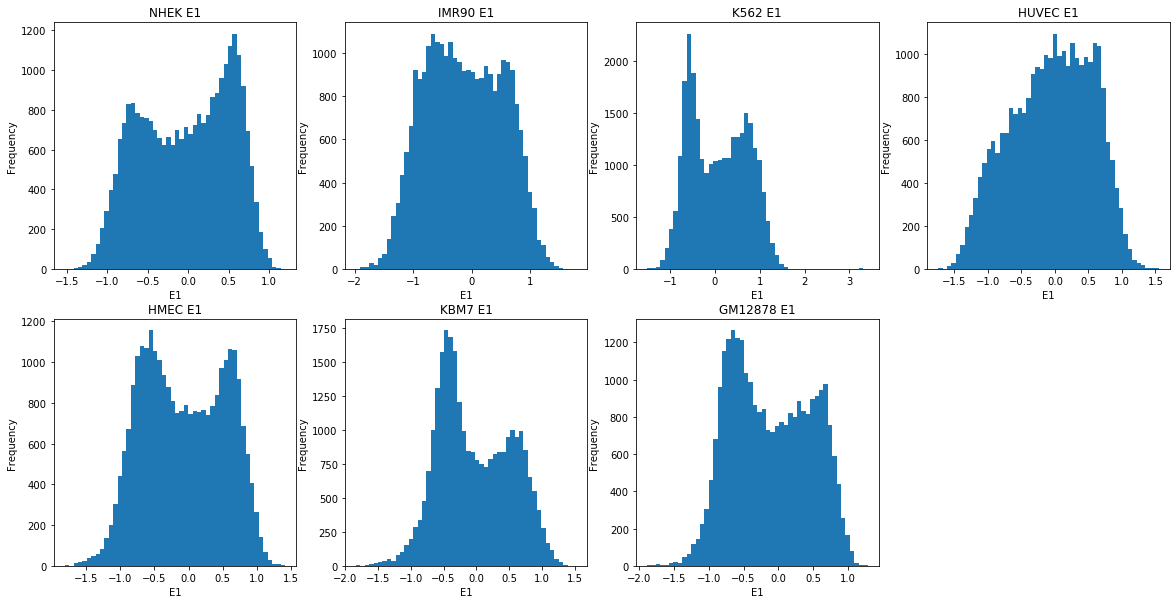

In [8]:
plt.figure(figsize = (20, 10))
for i in range(len(df)):
    plt.subplot(2, 4, i+1)
    plt.hist(tracks[i].E1[ tracks[i].E1 == tracks[i].E1].values, bins = 50)
    plt.title(df.iloc[i].cell_line + ' E1')
    plt.xlabel('E1')
    plt.ylabel('Frequency');

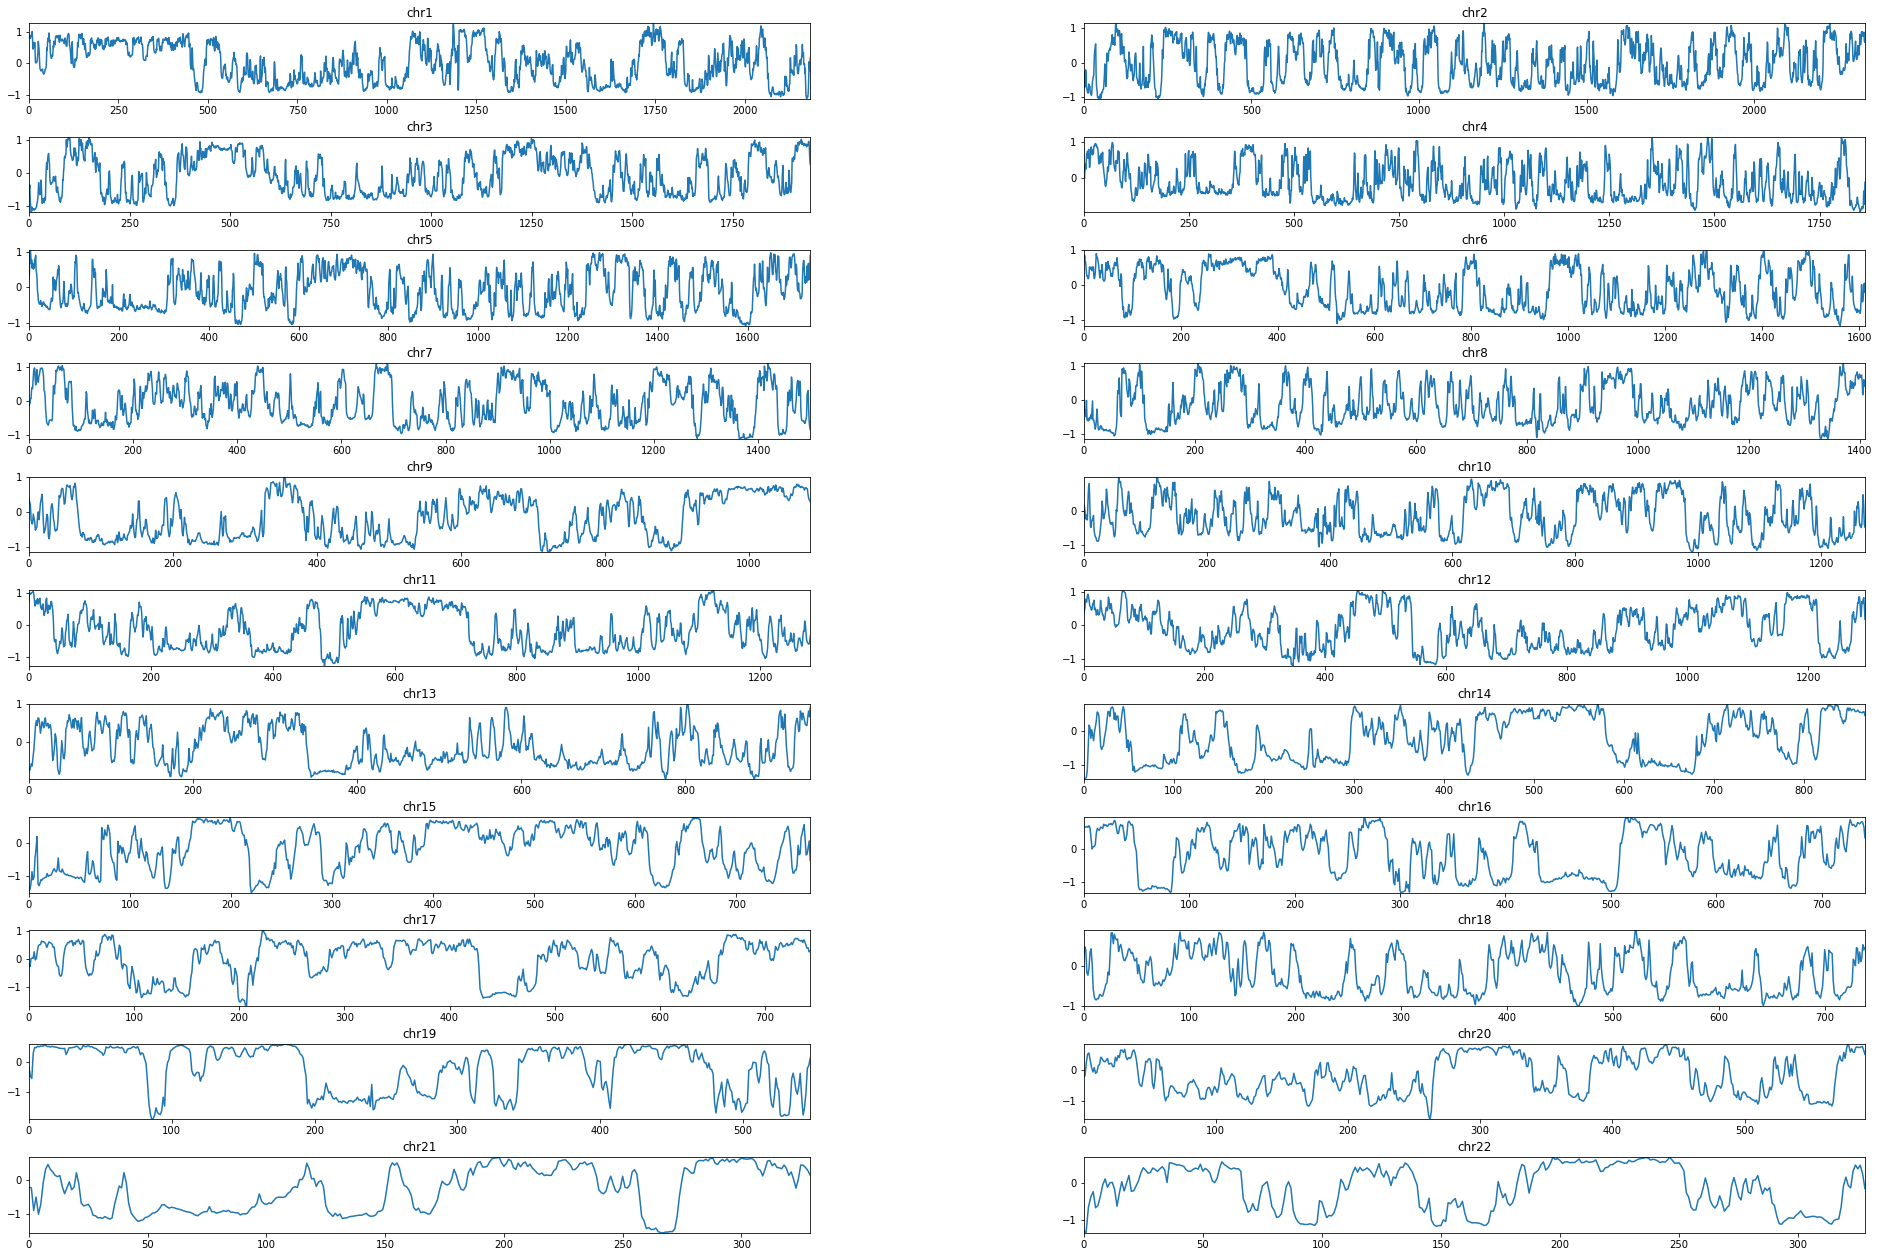

In [10]:
coolplots.plot_chroms(tracks[6], 'E1')

In [11]:
resdict = multianalysis.multi_analyze(df, tracks)

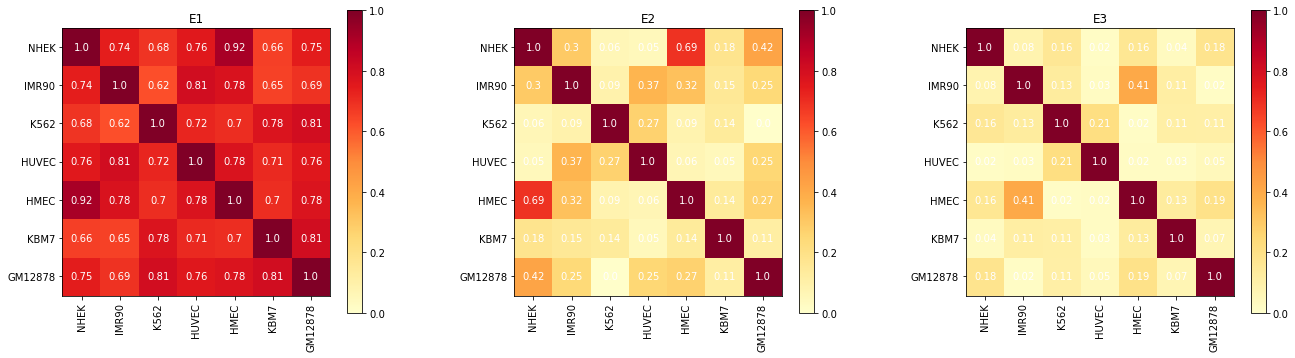

In [12]:
multianalysis.get_correlations(resdict, w= 35, l = 5)

In [13]:
chroms = tracks[0].chrom.unique()[:-2]

In [14]:
'''
multianalysis.get_chrom_correlations(resdict, chroms)
'''


'\nmultianalysis.get_chrom_correlations(resdict, chroms)\n'

In [491]:
reload(HMMC)

<module 'HMMC' from '/pollard/home/lchumpitaz/Hi-C/testing/HMMC.py'>

In [15]:
hmm_tracks = list()
for track in tracks:
    a =  HMMC.HMMC(track)
    a.analyze()
    hmm_tracks.append(a.loc_eig)

[ 0.  2.  0. ... -2.  3.  0.]
[ 0.  2. -2. ... -2.  0.  0.]
[ 2. -2.  2. ...  2.  0.  0.]
[ 2. -2.  0. ...  2.  0.  0.]
[ 0.  2. -2. ...  2. -2.  0.]
[ 2. -2.  2. ...  0.  2.  0.]
[ 2. -2.  2. ...  2. -2.  0.]


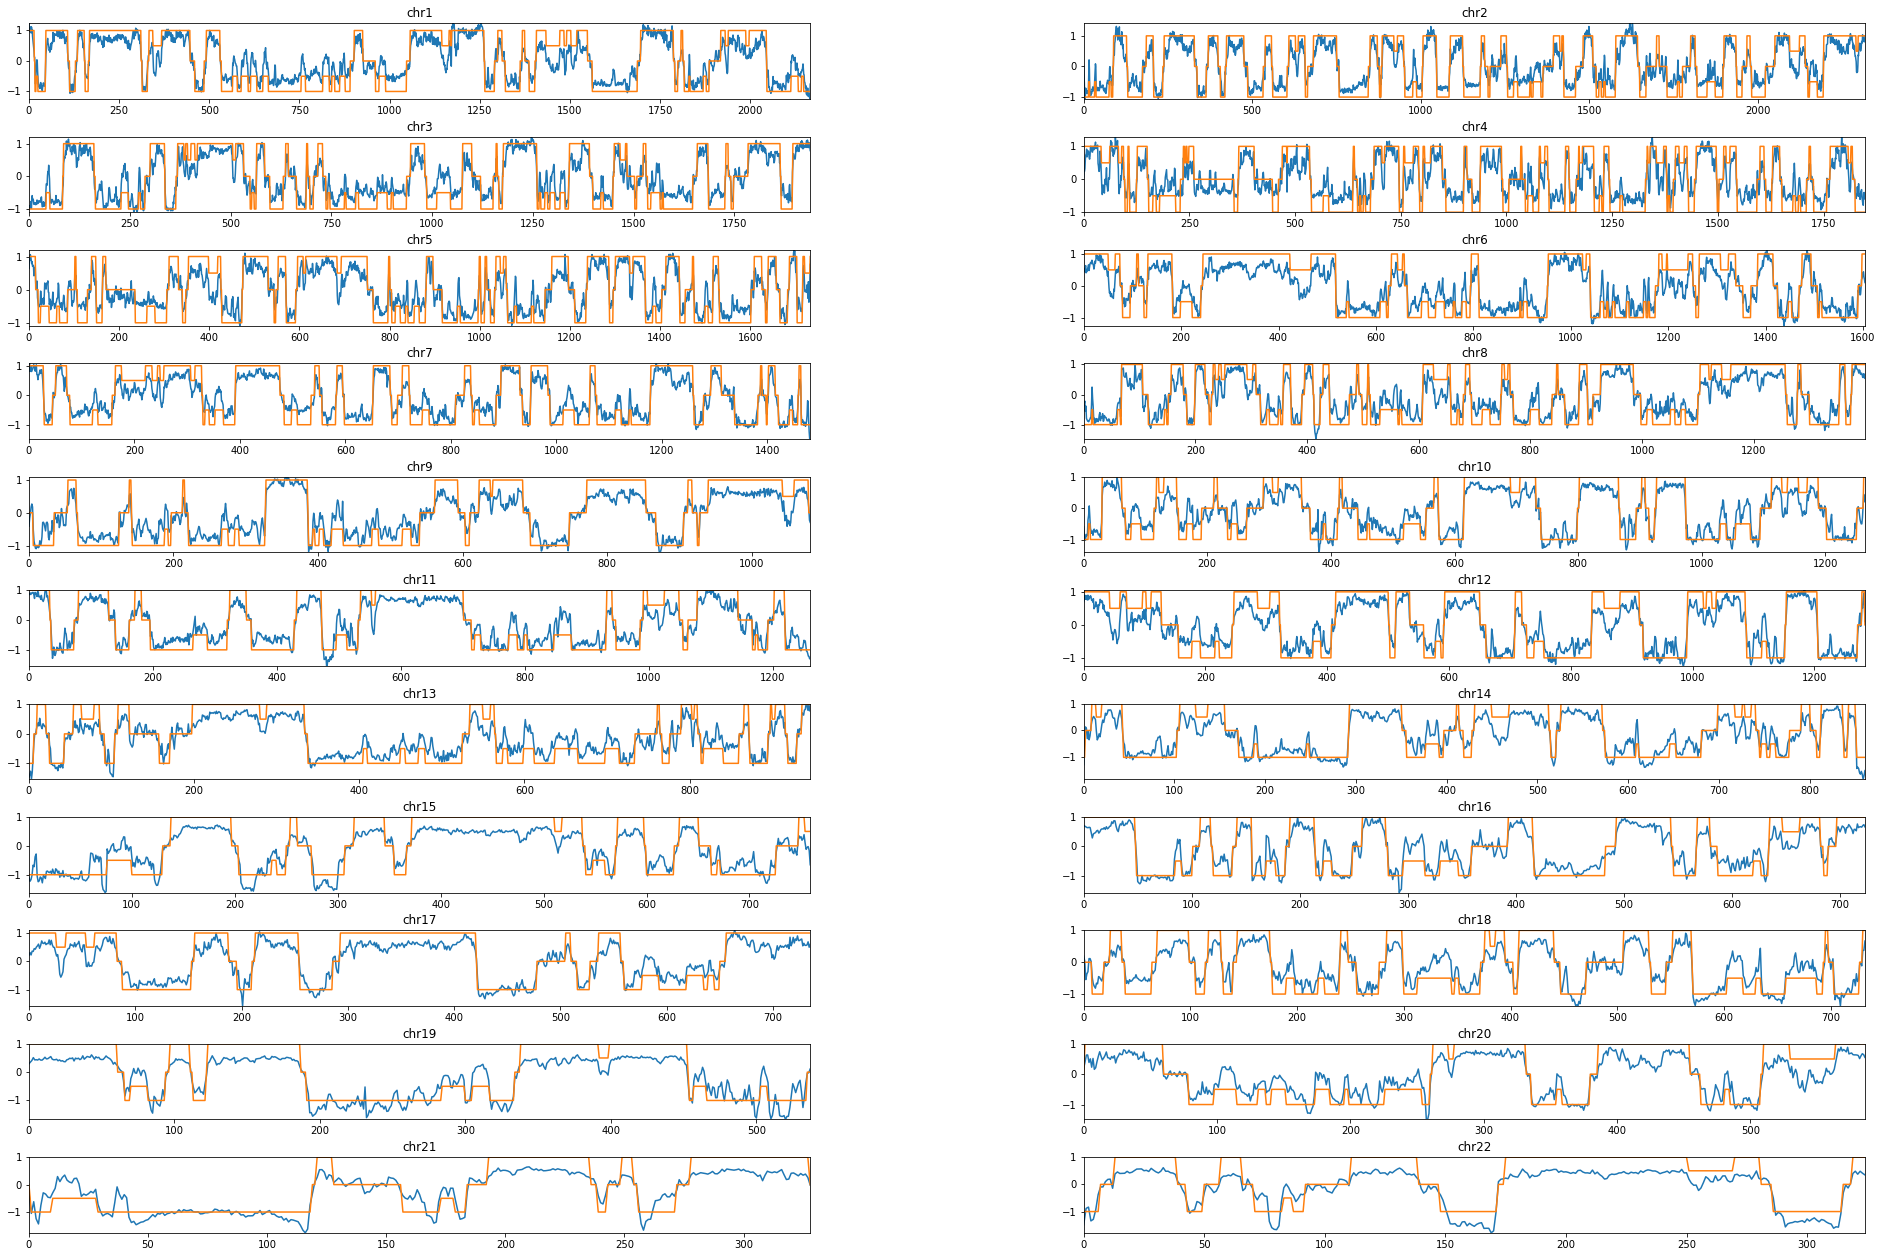

In [16]:
coolplots.plot_chroms(hmm_tracks[4], 'E1','HMM5_2')

In [17]:
resdict = multianalysis.multi_analyze(df, hmm_tracks, ['E1', 'binary', 'HMM2', 'HMM3','HMM4'])

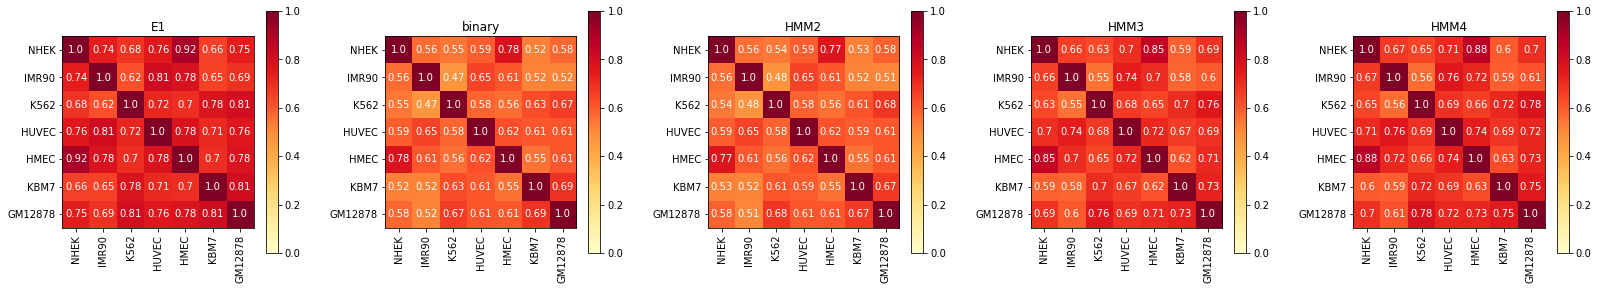

In [18]:
multianalysis.get_correlations(resdict, w= 25, l = 10)

In [19]:
reload(multianalysis)

<module 'multianalysis' from '/pollard/home/lchumpitaz/Hi-C/testing/multianalysis.py'>

/pollard/home/lchumpitaz/Hi-C/testing/multianalysis.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize  =(25, 4))


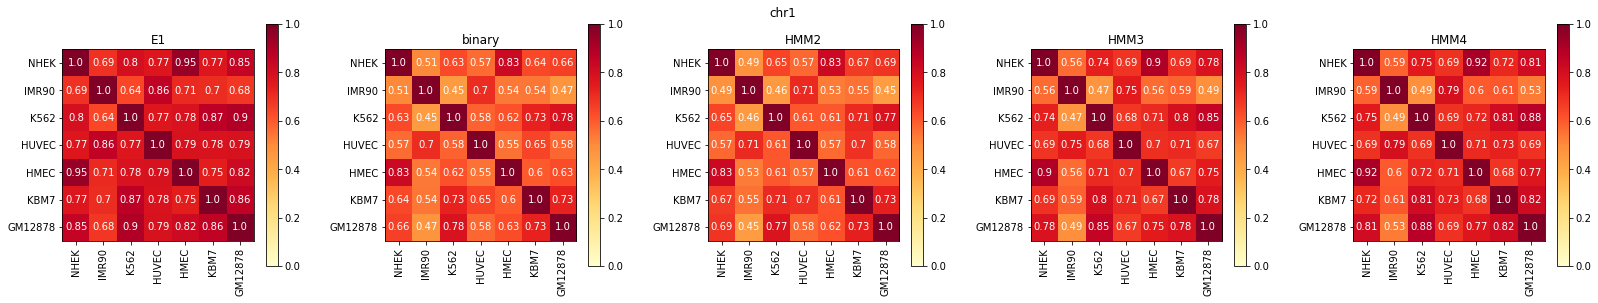

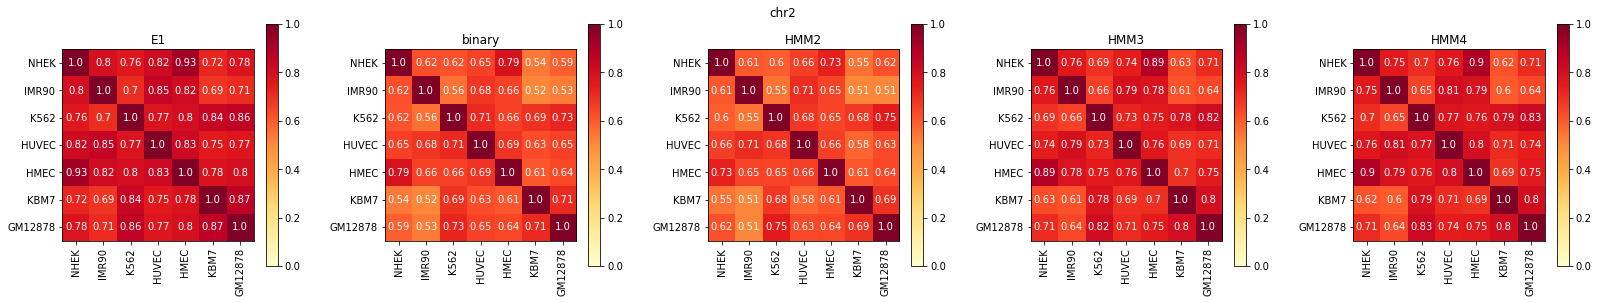

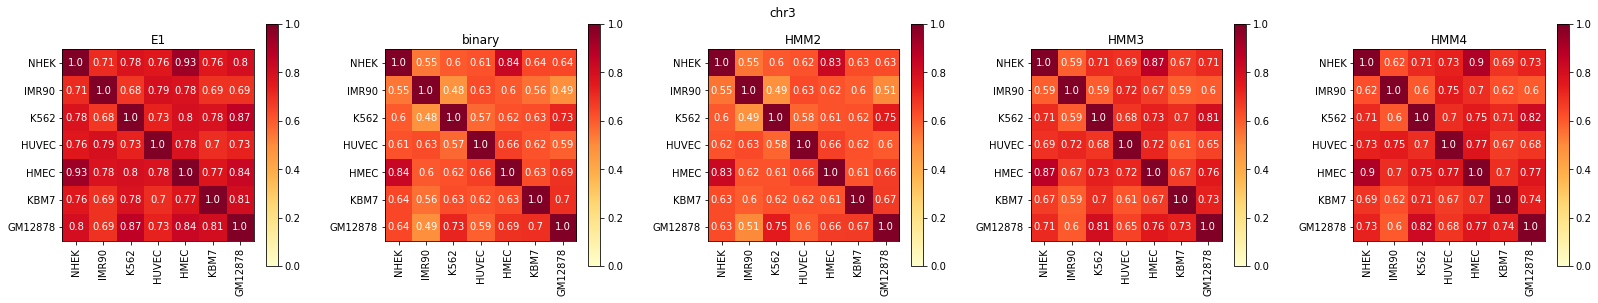

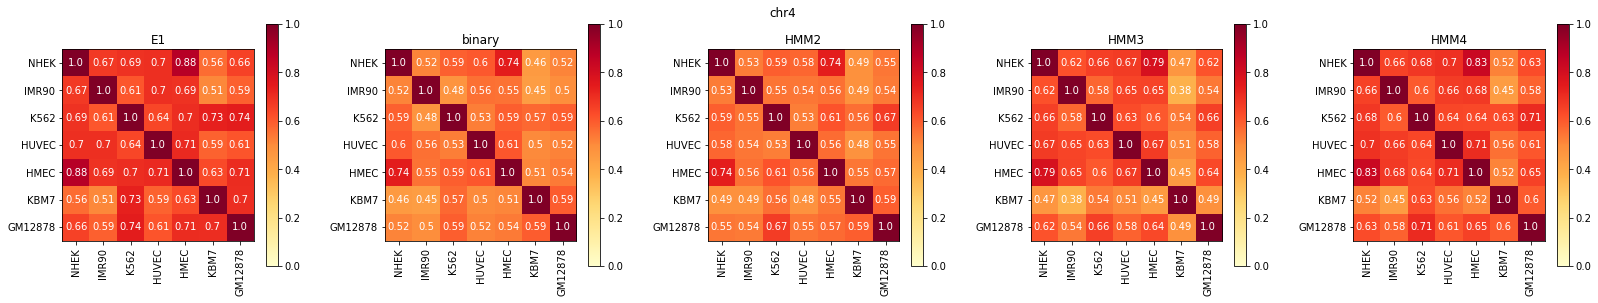

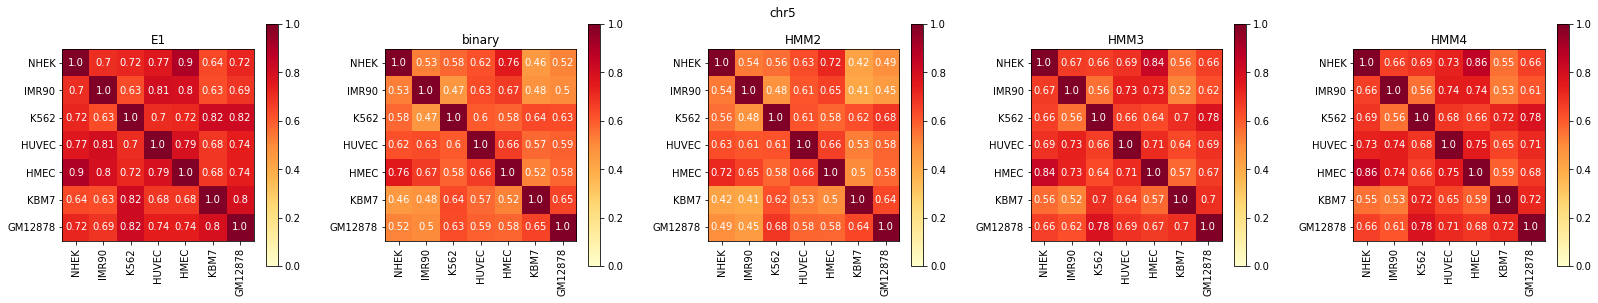

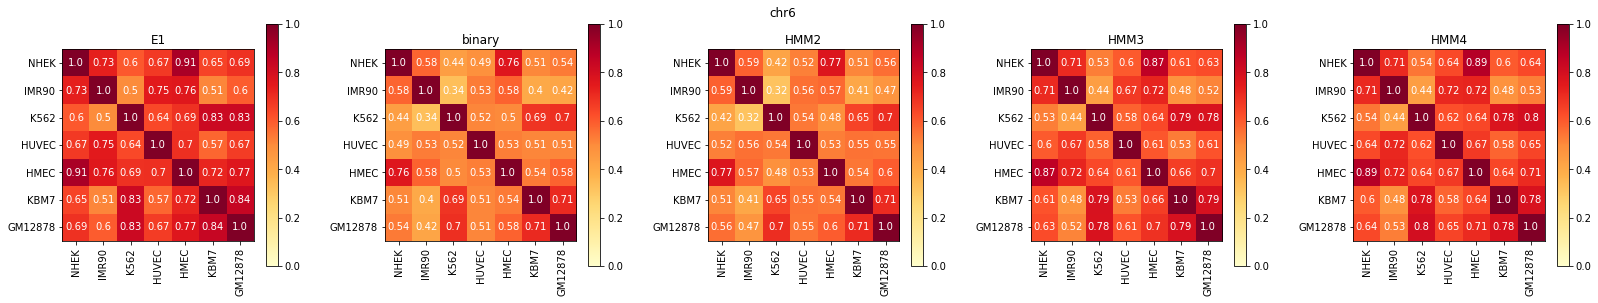

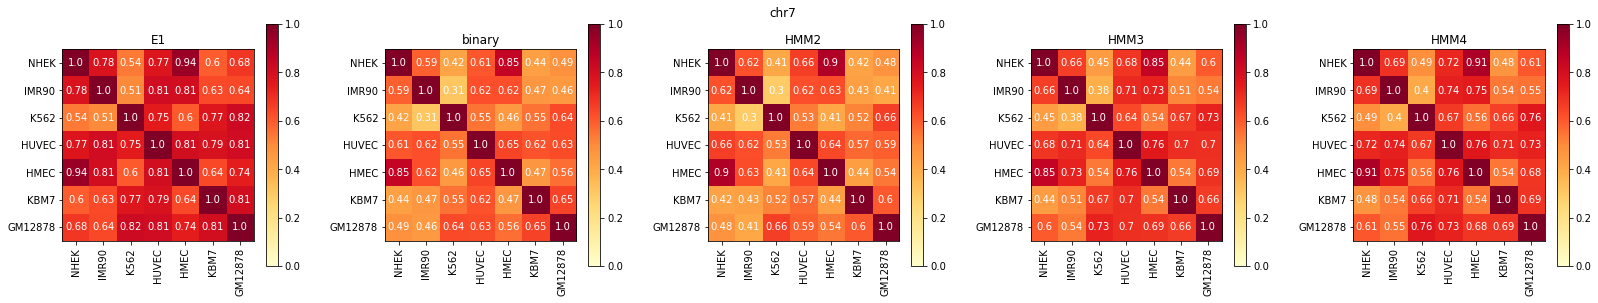

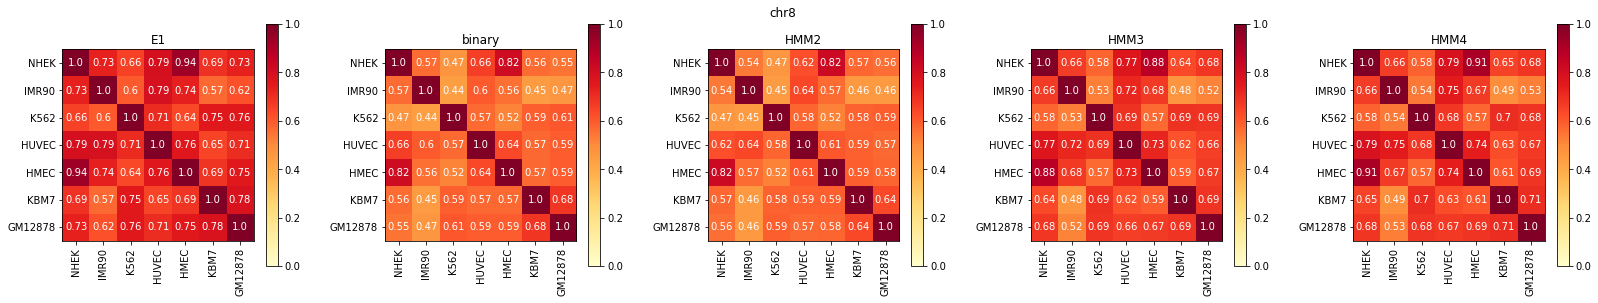

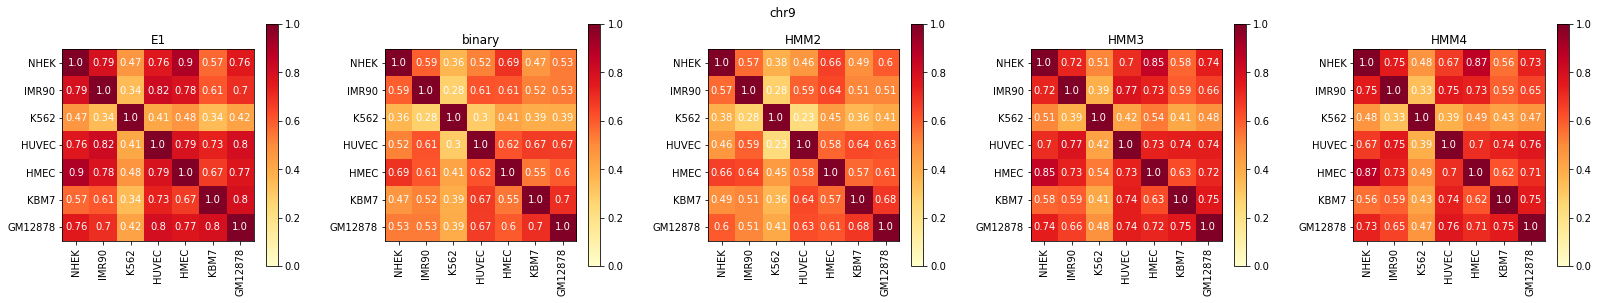

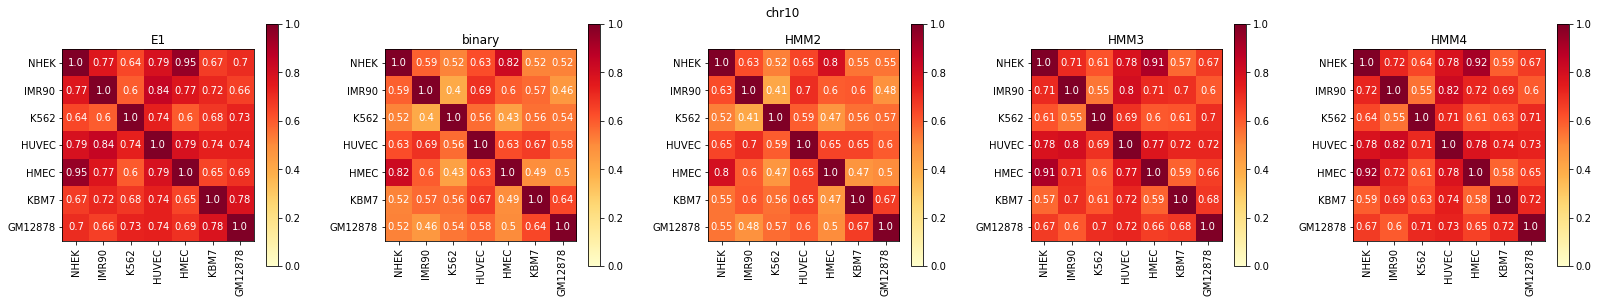

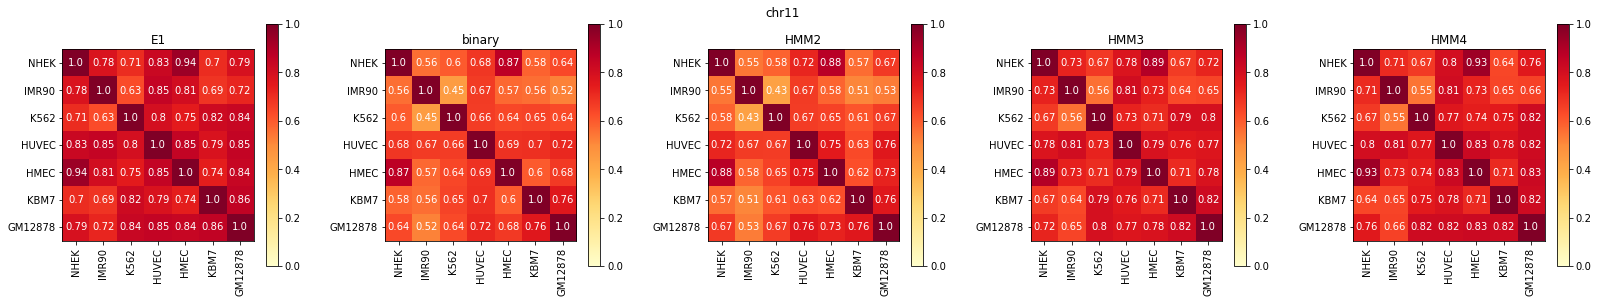

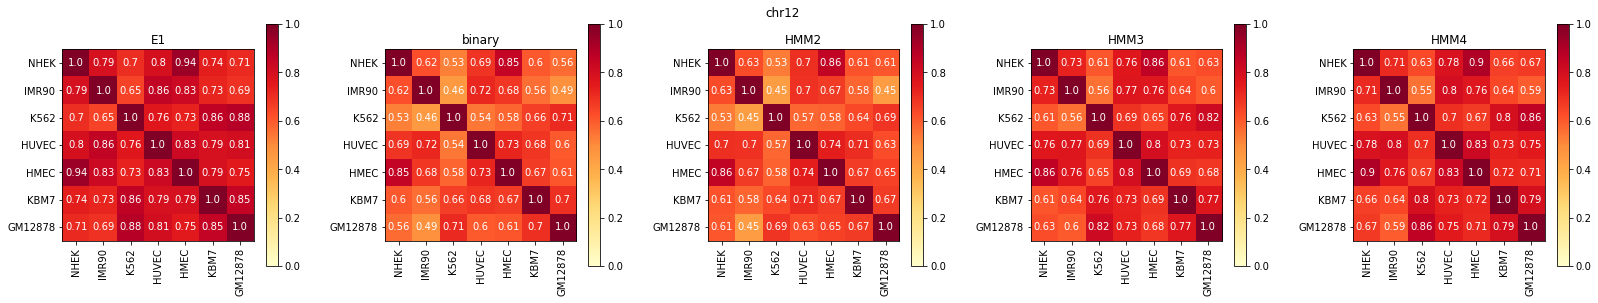

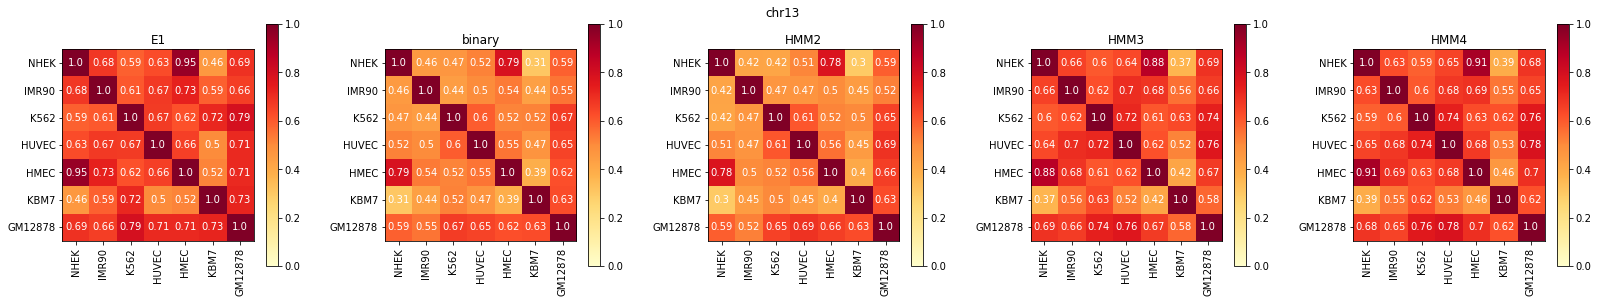

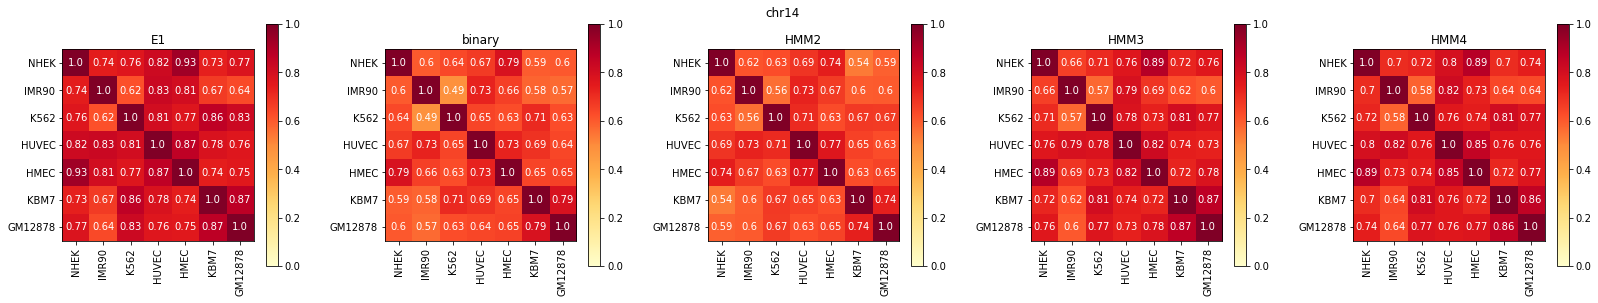

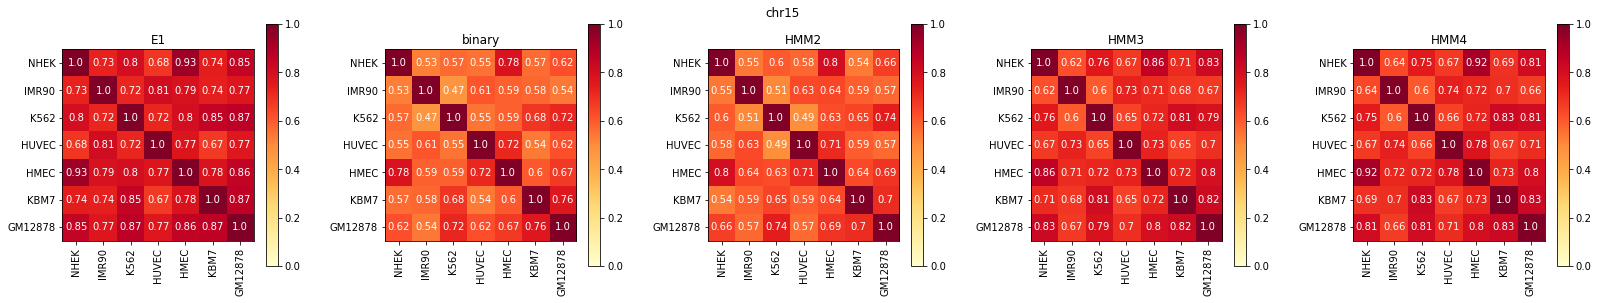

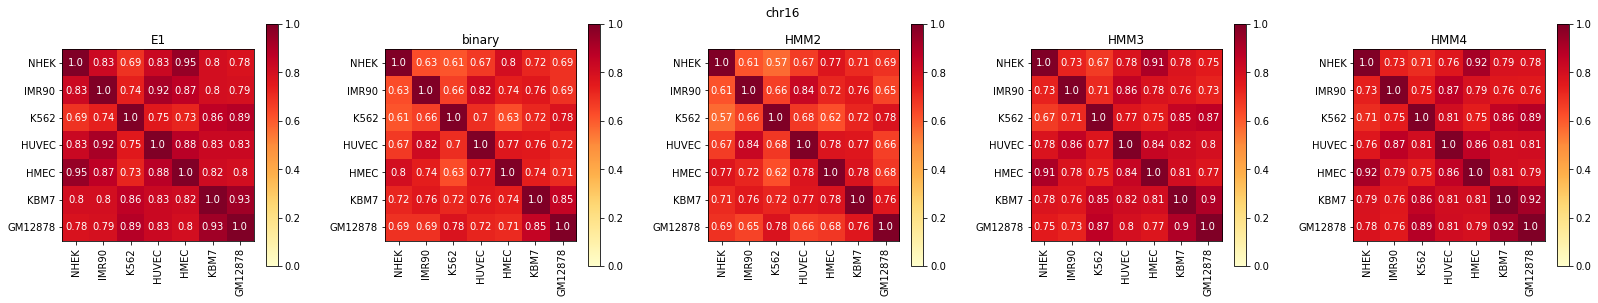

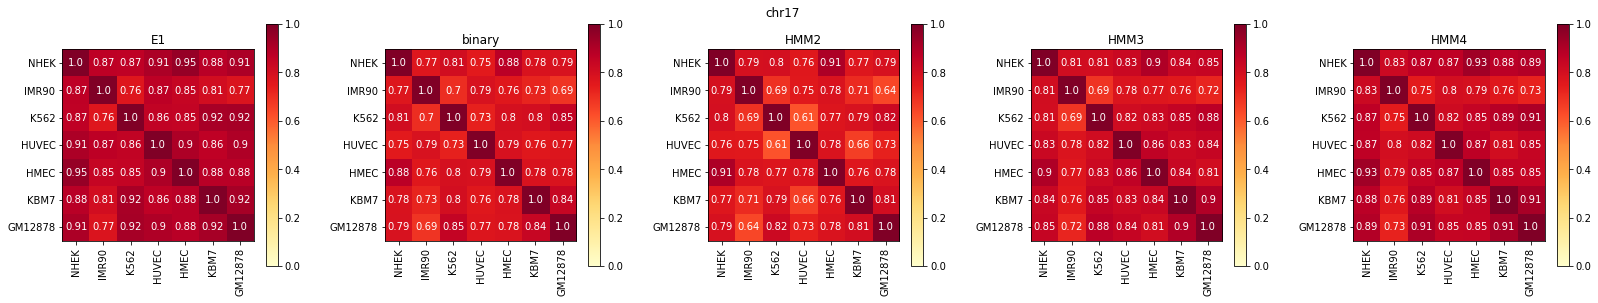

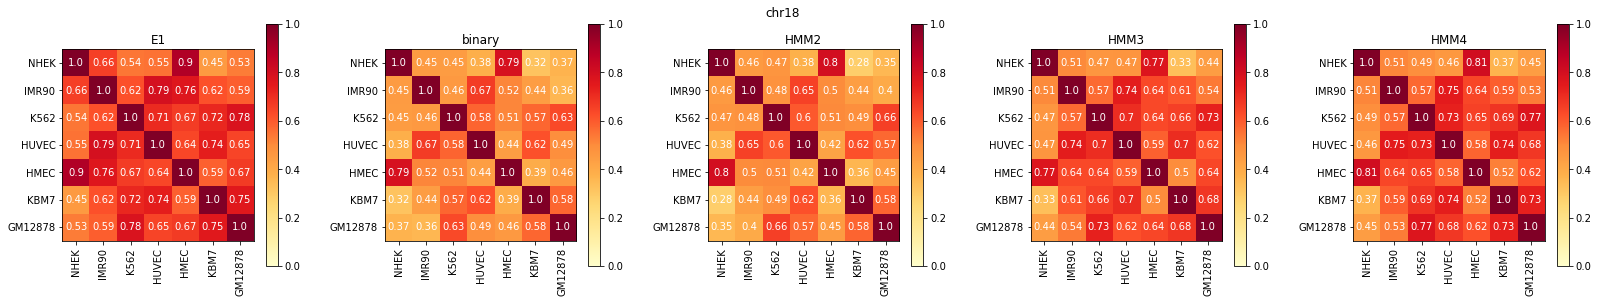

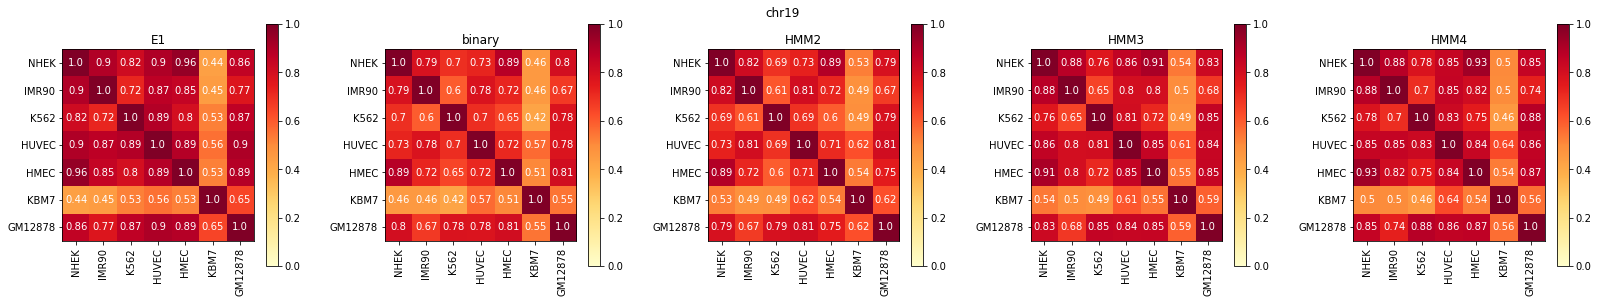

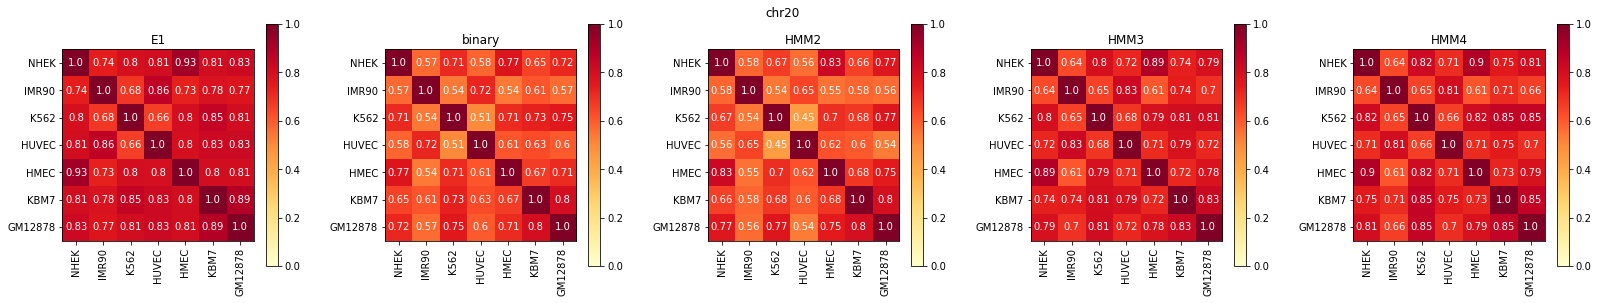

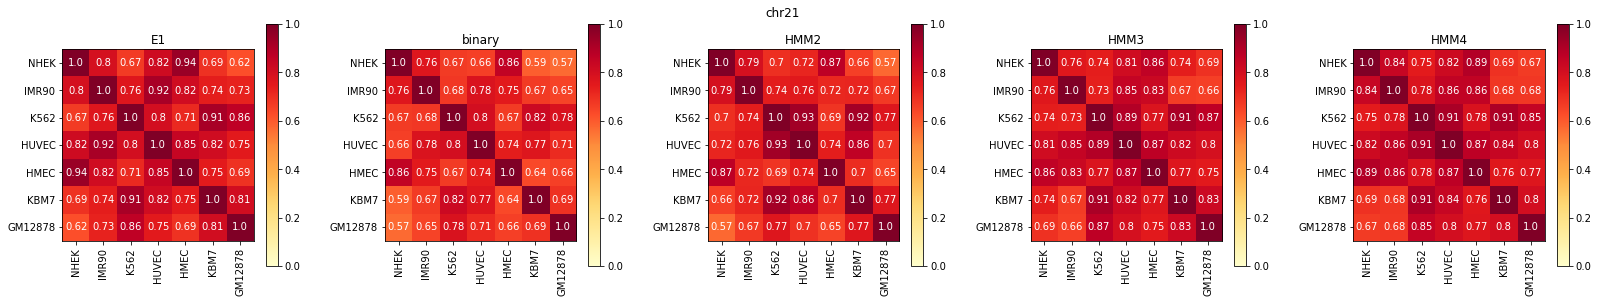

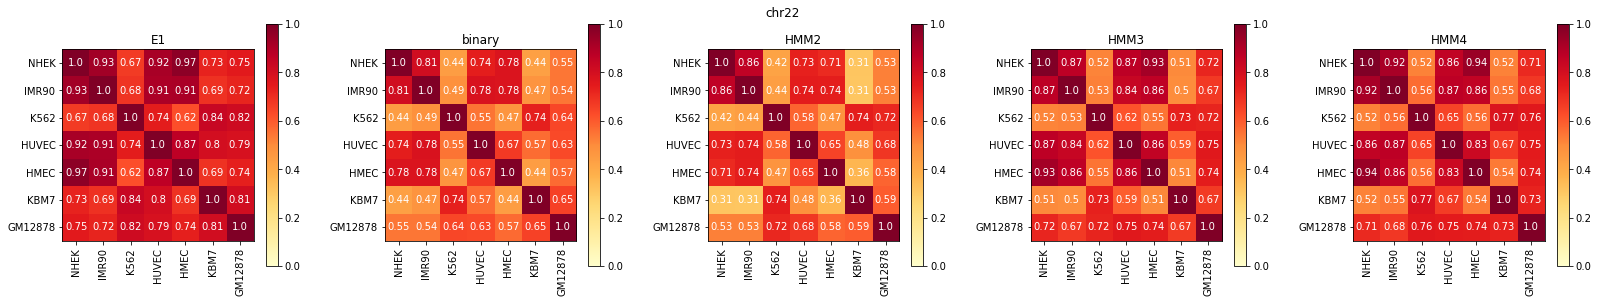

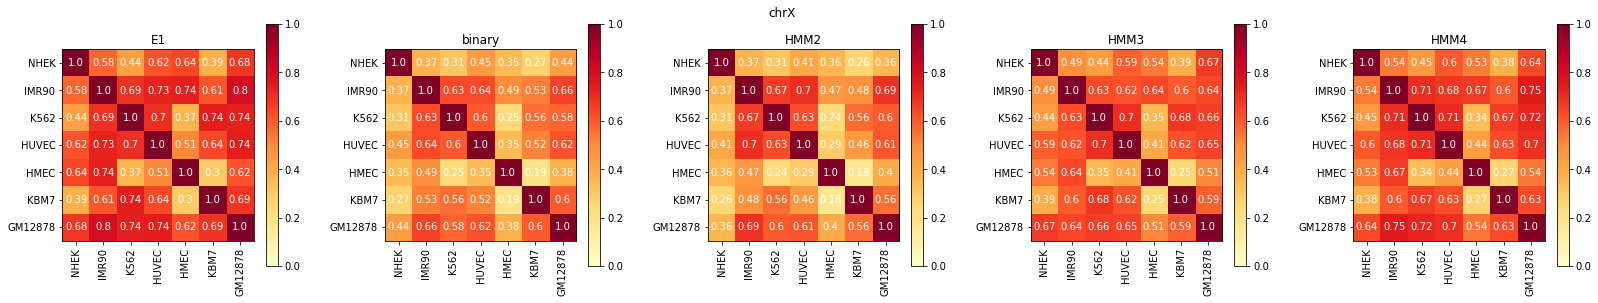

In [20]:
multianalysis.get_chrom_correlations(resdict, chroms)

In [22]:
reload(coolplots)

<module 'coolplots' from '/pollard/home/lchumpitaz/Hi-C/testing/coolplots.py'>

/pollard/home/lchumpitaz/Hi-C/testing/coolplots.py:57: RuntimeWarning: invalid value encountered in greater
  plt.fill_between(x, 0, E, where = E>0)
/pollard/home/lchumpitaz/Hi-C/testing/coolplots.py:58: RuntimeWarning: invalid value encountered in less
  plt.fill_between(x, 0, E, where = E<0)


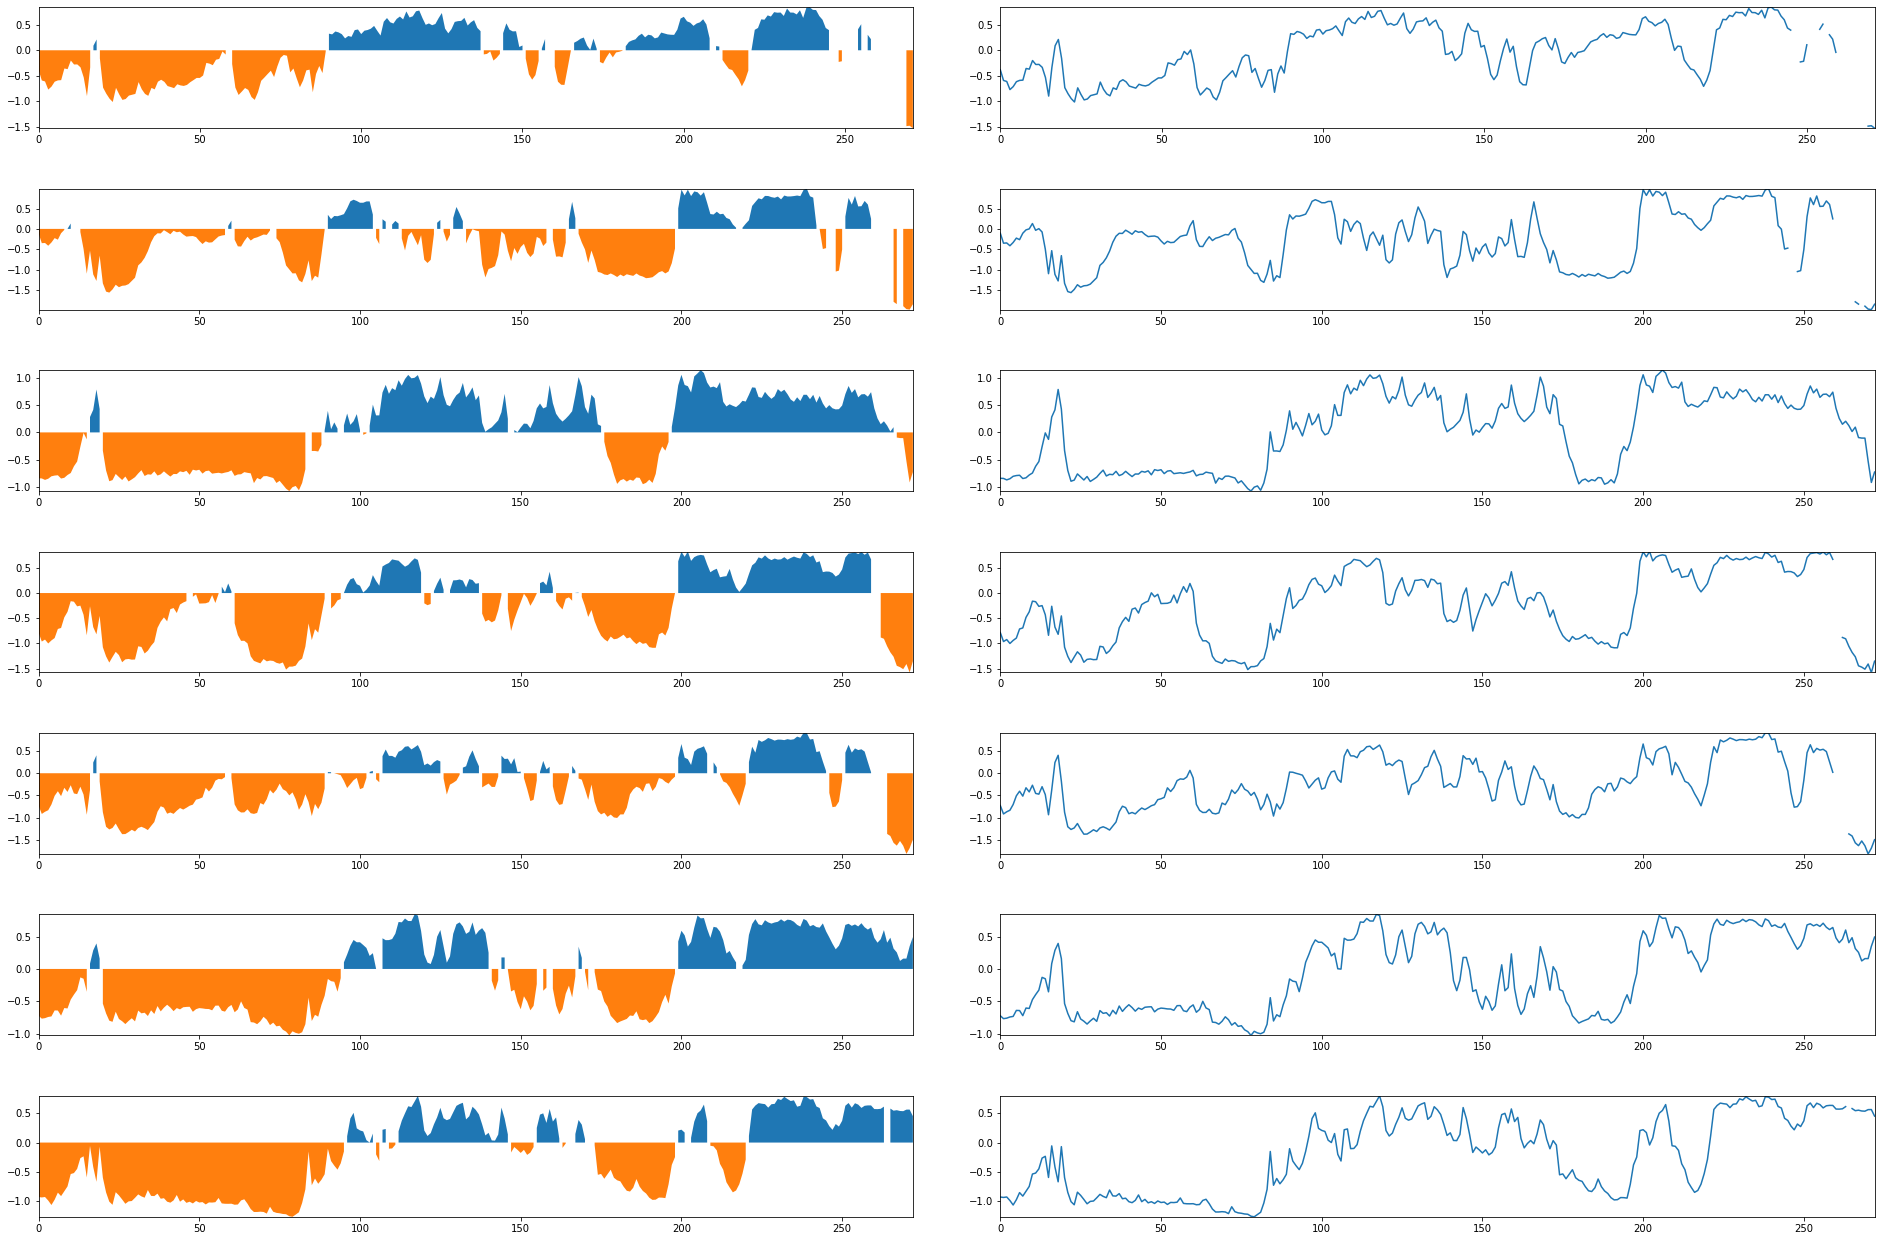

In [21]:
coolplots.compare_chroms(hmm_tracks, 'chr14', 800, -1, 'E1')

In [22]:
start, end = 800, -1
ch = 'chr14'

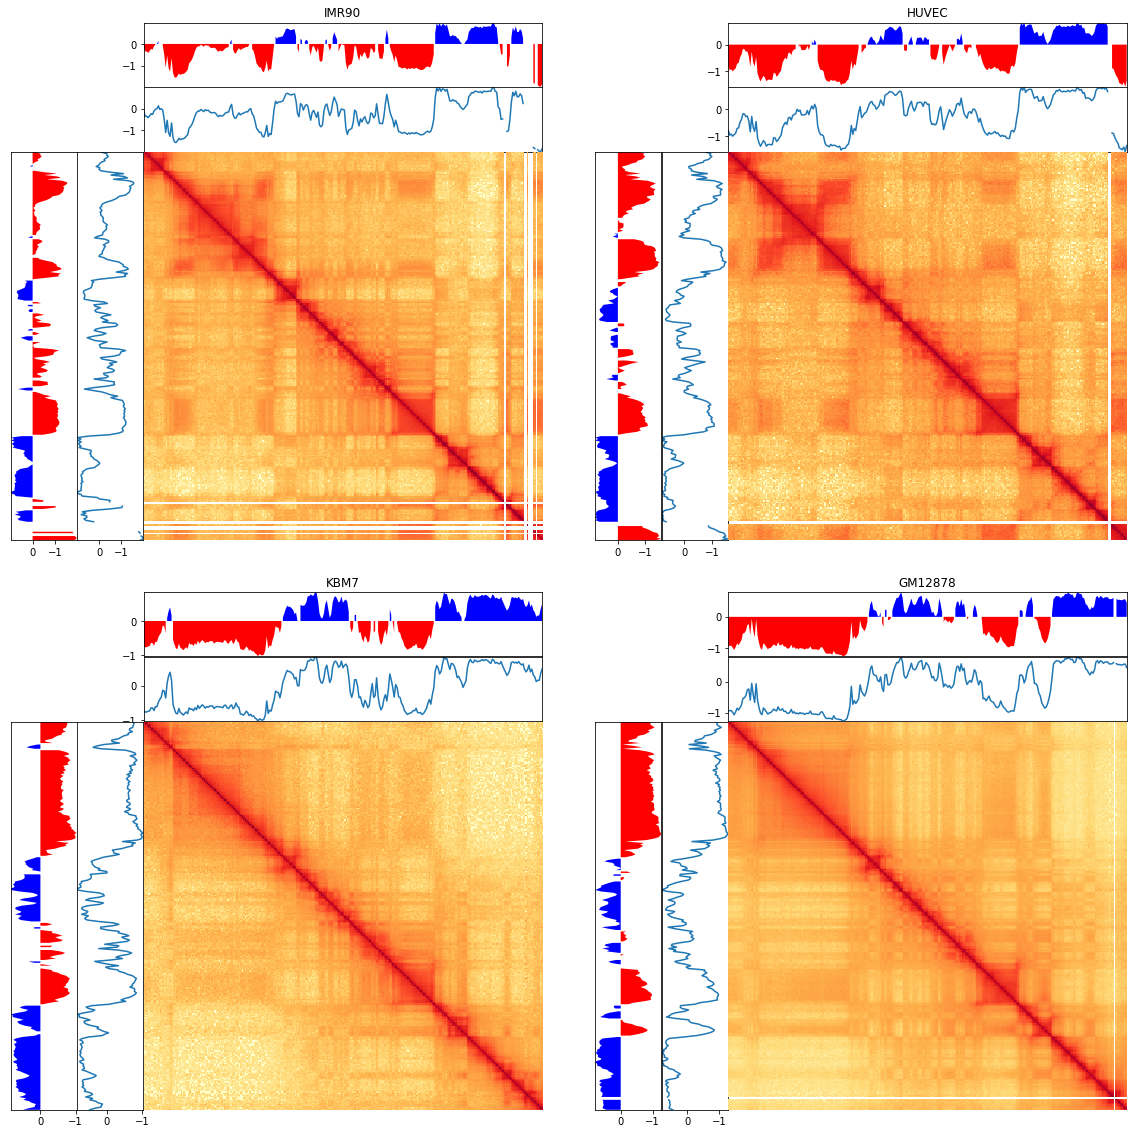

In [23]:
plt.figure(figsize = (20, 20))
t = [1, 3, 5, 6]
outer = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.1)

for i in range(len(t)):
    inner = gridspec.GridSpecFromSubplotSpec(8, 8, subplot_spec=outer[i], wspace=0.01, hspace=0.01)
    
    y = hmm_tracks[t[i]]
    
    y = y[y.chrom == ch].E1
    x = np.linspace(0, len(y)-1, len(y))
    
    

    plt.subplot(inner[0, 2:])
    plt.title(df.cell_line[t[i]])
    
    
   
    plt.fill_between(x[start:end], y[start:end], where= y[start:end] > 0, facecolor='blue')
    plt.fill_between(x[start:end], y[start:end], where= y[start:end] < 0, facecolor='red')

    plt.gca().axes.get_xaxis().set_visible(False)
    plt.margins(0)
    
    
    plt.subplot(inner[1, 2:])
    
    
    plt.plot(x[start:end], y[start:end])
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.margins(0)
    
    
    
    plt.subplot(inner[2:, 0])
    
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.gca().axes.get_yaxis().set_visible(False)
    
    plt.fill_betweenx(x[start:end], y[start:end], where= y[start:end] > 0, facecolor='blue')
    plt.fill_betweenx(x[start:end], y[start:end], where= y[start:end] < 0, facecolor='red')
    plt.margins(0)


    
    
    plt.subplot(inner[2:, 1])
    
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.gca().axes.get_yaxis().set_visible(False)
    
    plt.plot(y[start:end], x[start:end])
    plt.margins(0)
    
    
    
    plt.subplot(inner[2:, 2:])
    arr = df.cooler[t[i]].matrix().fetch(ch)[start:end, start:end]
    plt.imshow(np.log(arr + 1e-5), cmap = 'YlOrRd', aspect='auto')
    plt.axis('off')

    

In [24]:
bed_dir = '/pollard/data/functional_genomics/encode'

In [25]:
beds = fileprocessing.get_files(bed_dir, 'bed.gz')

In [26]:
beds_df = fileprocessing.beds_df(beds)
beds_df.head()

cell_line     assay     file_format  \
0  keratinocyte  ChIP-seq  bed narrowPeak   
1  keratinocyte  ChIP-seq  bed narrowPeak   
2  keratinocyte  ChIP-seq  bed narrowPeak   
3  keratinocyte  ChIP-seq  bed narrowPeak   
4  keratinocyte  ChIP-seq  bed narrowPeak   

                             output_type assembly file_status target  \
0          optimal idr thresholded peaks   GRCh38    released   CTCF   
1  peaks and background as input for IDR   GRCh38    released   CTCF   
2  peaks and background as input for IDR   GRCh38    released   CTCF   
3  peaks and background as input for IDR   GRCh38    released   CTCF   
4     conservative idr thresholded peaks     hg19    released   CTCF   

  biosample_treatment                   lab replicate           file_name  \
0                None  Vishwanath Iyer, UTA    rep1,2  ENCFF028IIR.bed.gz   
1                None  Vishwanath Iyer, UTA    rep1,2  ENCFF465MVV.bed.gz   
2                None  Vishwanath Iyer, UTA      rep1  ENCFF301UPP.bed.gz   
3                None  Vishwanath Iyer, UTA      rep2  ENCFF623KYU.bed.gz   
4                None  Vishwanath Iyer, UTA    rep1,2  ENCFF226MQR.bed.gz   

                                       file_location  
0  /pollard/data/functional_genomics/encode/kerat...  
1  /pollard/data/functional_genomics/encode/kerat...  
2  /pollard/data/functional_genomics/encode/kerat...  
3  /pollard/data/functional_genomics/encode/kerat...  
4  /pollard/data/functional_genomics/encode/kerat...

In [354]:
#targets = ['H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K9ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K79me2', 'H4K20me1']

In [580]:
i = 1
df.iloc[i]

cell_line                                                IMR90
assembly                                                  hg19
path         /pollard/data/chromatin_organization/rao2014/d...
cooler       <Cooler "IMR90_inSitu_MboI.hg19.mapq_30.1000.m...
Name: 1, dtype: object

In [28]:
def get_chips(beds_df, cell_line, assembly):
    loc = beds_df[( beds_df.cell_line == cell_line)& 
                  (beds_df.assembly == assembly) 
                  &(beds_df.replicate == 'rep1,2')
                 ]
    loc = loc.reset_index(drop = True)
    return loc

In [582]:
loc

cell_line     assay     file_format                         output_type  \
0      IMR90  ChIP-seq  bed narrowPeak                    replicated peaks   
1      IMR90  ChIP-seq  bed narrowPeak                    replicated peaks   
2      IMR90  ChIP-seq  bed narrowPeak                    replicated peaks   
3      IMR90  ChIP-seq  bed narrowPeak                    replicated peaks   
4      IMR90  ChIP-seq  bed narrowPeak                    replicated peaks   
..       ...       ...             ...                                 ...   
81     IMR90  ChIP-seq  bed narrowPeak  conservative idr thresholded peaks   
82     IMR90  ChIP-seq  bed narrowPeak  conservative idr thresholded peaks   
83     IMR90  ChIP-seq  bed narrowPeak  conservative idr thresholded peaks   
84     IMR90  ChIP-seq  bed narrowPeak  conservative idr thresholded peaks   
85     IMR90  ChIP-seq  bed narrowPeak  conservative idr thresholded peaks   

   assembly file_status    target biosample_treatment  \
0      hg19    released   H3K4me3                None   
1      hg19    released  H3K79me2                None   
2      hg19    released     H2AFZ                None   
3      hg19    released   H3K27ac                None   
4      hg19    released  H2BK20ac                None   
..      ...         ...       ...                 ...   
81     hg19    released       MAZ                None   
82     hg19    released   BHLHE40                None   
83     hg19    released      ELK1                None   
84     hg19    released      MAFK                None   
85     hg19    released      CTCF                None   

                         lab replicate           file_name  \
0             Bing Ren, UCSD    rep1,2  ENCFF154CUR.bed.gz   
1             Bing Ren, UCSD    rep1,2  ENCFF234QEZ.bed.gz   
2             Bing Ren, UCSD    rep1,2  ENCFF695WSZ.bed.gz   
3             Bing Ren, UCSD    rep1,2  ENCFF678QLP.bed.gz   
4             Bing Ren, UCSD    rep1,2  ENCFF237BCI.bed.gz   
..                       ...       ...                 ...   
81  Michael Snyder, Stanford    rep1,2  ENCFF751YOW.bed.gz   
82  Michael Snyder, Stanford    rep1,2  ENCFF039HQG.bed.gz   
83  Michael Snyder, Stanford    rep1,2  ENCFF625AUG.bed.gz   
84  Michael Snyder, Stanford    rep1,2  ENCFF808HZT.bed.gz   
85  Michael Snyder, Stanford    rep1,2  ENCFF453XKM.bed.gz   

                                        file_location  
0   /pollard/data/functional_genomics/encode/IMR-9...  
1   /pollard/data/functional_genomics/encode/IMR-9...  
2   /pollard/data/functional_genomics/encode/IMR-9...  
3   /pollard/data/functional_genomics/encode/IMR-9...  
4   /pollard/data/functional_genomics/encode/IMR-9...  
..                                                ...  
81  /pollard/data/functional_genomics/encode/IMR-9...  
82  /pollard/data/functional_genomics/encode/IMR-9...  
83  /pollard/data/functional_genomics/encode/IMR-9...  
84  /pollard/data/functional_genomics/encode/IMR-9...  
85  /pollard/data/functional_genomics/encode/IMR-9...  

[86 rows x 12 columns]

In [436]:
loc[loc.target == 'H3K4me1']

cell_line     assay     file_format       output_type assembly  \
129   GM12878  ChIP-seq  bed narrowPeak  replicated peaks     hg19   
247   GM12878  ChIP-seq  bed narrowPeak             peaks     hg19   

    file_status   target biosample_treatment                       lab  \
129    released  H3K4me1                None  Bradley Bernstein, Broad   
247    released  H3K4me1                None  Bradley Bernstein, Broad   

    replicate           file_name  \
129    rep1,2  ENCFF921LKB.bed.gz   
247    rep1,2  ENCFF507SNM.bed.gz   

                                         file_location  
129  /pollard/data/functional_genomics/encode/GM128...  
247  /pollard/data/functional_genomics/encode/GM128...

In [437]:
reload(badtools)

<module 'badtools' from '/pollard/home/lchumpitaz/Hi-C/testing/badtools.py'>

In [31]:
def run_process(f, collection):
    
    try:
        with Pool(processes=30) as pool:
            r = pool.starmap(f, collection)
            print('Succesful')
        return r
    except:
        print('Error in collection')
        return [None]

In [32]:
df.cell_line.unique()

array(['NHEK', 'IMR90', 'K562', 'HUVEC', 'HMEC', 'KBM7', 'GM12878'],
      dtype=object)

In [33]:
i = 0
loc = get_chips(beds_df, df.iloc[i].cell_line, df.iloc[i].assembly)


In [34]:
results = [run_process(badtools.chip_intersect, zip(itertools.repeat(hmm_tracks[i]), get_chips(beds_df, df.iloc[i].cell_line, df.iloc[i].assembly).file_location.values.tolist()))
           for  i in range(len(df))]

Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful


In [35]:
r = results[6]

In [36]:
len(r)

389

In [255]:
import sklearn.preprocessing as preprocessing
from scipy.signal import convolve2d

def find_pattern(seq, pattern, depth):
    
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    enc.fit(pattern[:, None])
    conv_list = list()
    index_list = list()
    for d in range(1, depth + 1):
        
        h = np.append( pattern[0], np.append(np.repeat(pattern[1:-1], d), pattern[-1]))
        x_ = enc.transform(seq[:, None]).toarray().T
        h_ = enc.transform(h[:, None]).toarray().T
        
        y = convolve2d(x_, h_, mode = 'same')[1]
        
        index_list.append(np.where(y == len(h_.T))[0])
        conv_list.append(y)
    
    return conv_list, index_list

In [610]:
def mask_signal(df, sig_target, sig_rule):
    '''
        df: pandas dataframe
        sig_target: column name of which desired signal is to be masked
        sig_rule: column name of the signal that is set to be used as the masking rule
    '''
    mask = df[sig_rule] == df[sig_rule]
    
    return df[mask][sig_target].values

In [603]:
def get_window(indexes, signal, window = 5):
    '''
        indexes: list of indexes
        signal: np.array of signal to be windowed
        window: int of size of window
    '''
    #mask = np.where( np.diff(indexes)> 2*window+1)[0]
    
    #mask = np.append(0, mask)
    
    
    return np.array([signal[index-window:index+window+1] for index in indexes])
    

In [681]:
def stack_windows(index_list, target_signal, window = 5):
    window_list = list()
    
    for indexes in index_list:
        if len(indexes) == 0:
            continue
            
        indexes = indexes[np.where(indexes>window)[0]]
        windows = get_window(indexes, target_signal, window = window)
        #print(windows.shape)
        window_list.append(windows)
        
        
    return np.concatenate(window_list, axis = 0)

In [673]:
x = np.array([2, 10, 11, 12])

In [667]:
k = 1
loc = get_chips(beds_df, df.iloc[k].cell_line, df.iloc[k].assembly)

In [668]:
x = mask_signal(hmm_tracks[k], 'HMM3', 'E1')
h = np.array([2, 1, 0])
conv_list, index_list = find_pattern(x, h, 50)

In [669]:
windows = stack_windows(index_list, mask_signal(hmm_tracks[k], 'E1', 'E1'), window = 14)

(99, 29)
(45, 29)
(25, 29)
(25, 29)
(21, 29)
(8, 29)
(13, 29)
(11, 29)
(10, 29)
(10, 29)
(6, 29)
(7, 29)
(7, 29)
(4, 29)
(2, 29)
(1, 29)
(1, 29)
(3, 29)
(3, 29)
(2, 29)
(3, 29)
(4, 29)
(1, 29)
(1, 29)
(1, 29)
(1, 29)
(2, 29)
(2, 29)
(1, 29)


/pollard/home/lchumpitaz/anaconda2/envs/HC/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/pollard/home/lchumpitaz/anaconda2/envs/HC/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


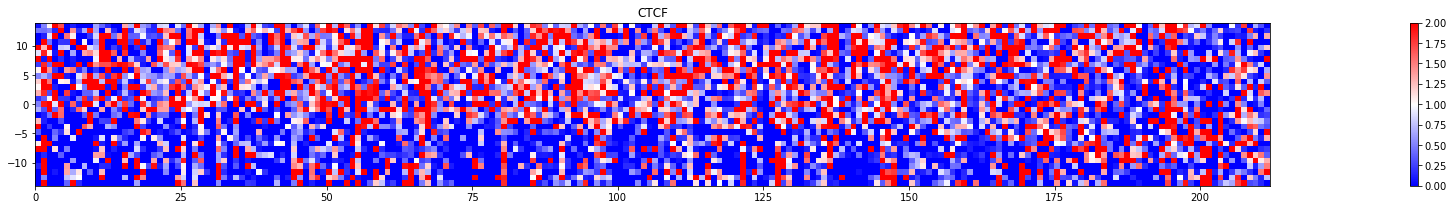

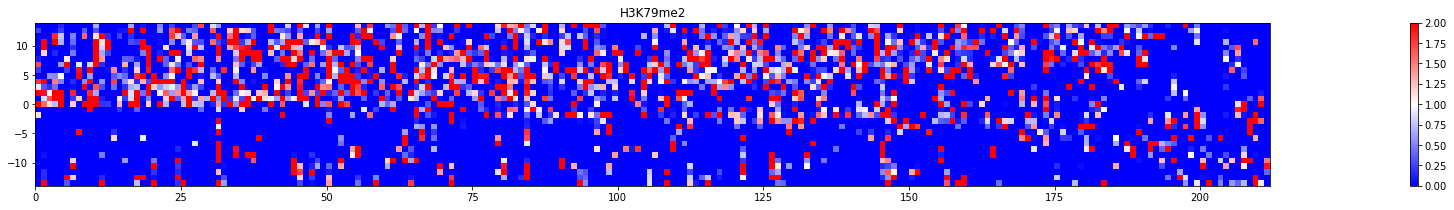

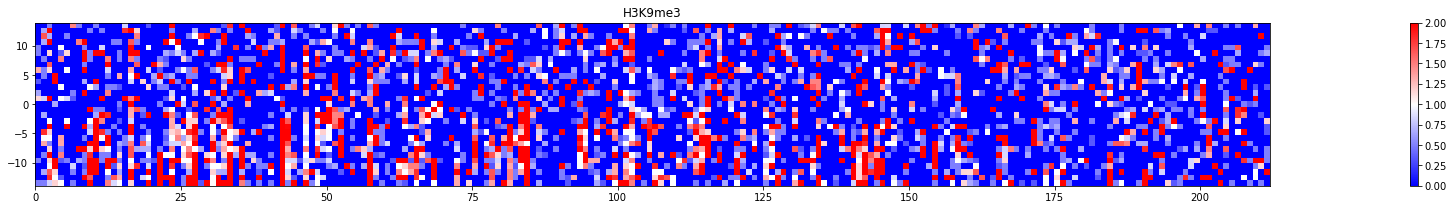

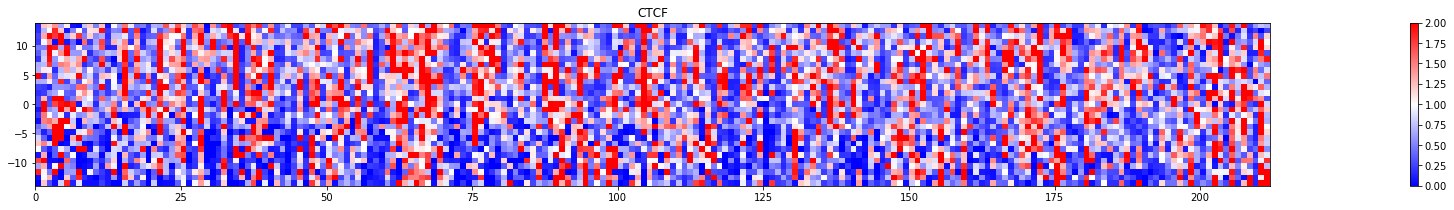

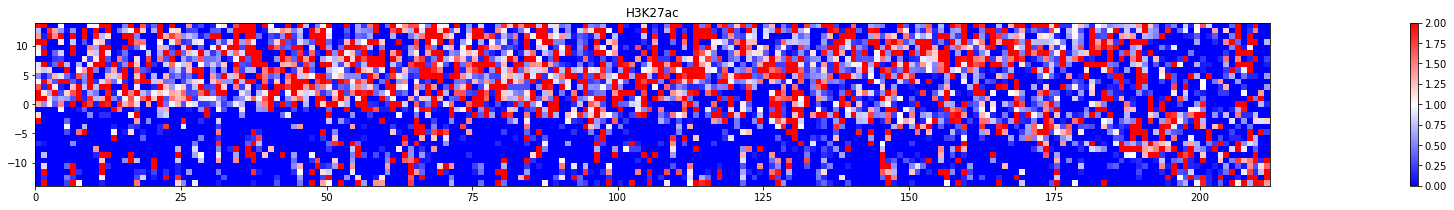

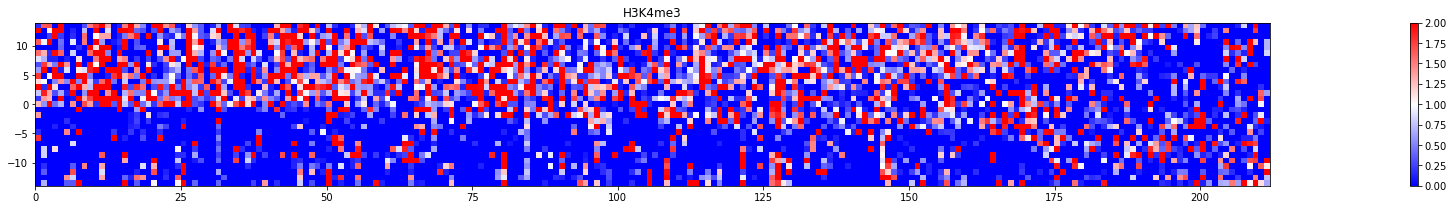

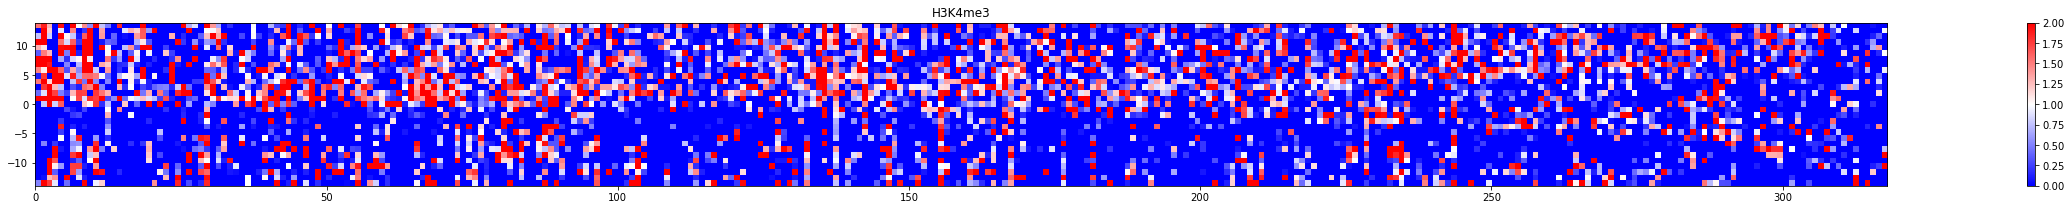

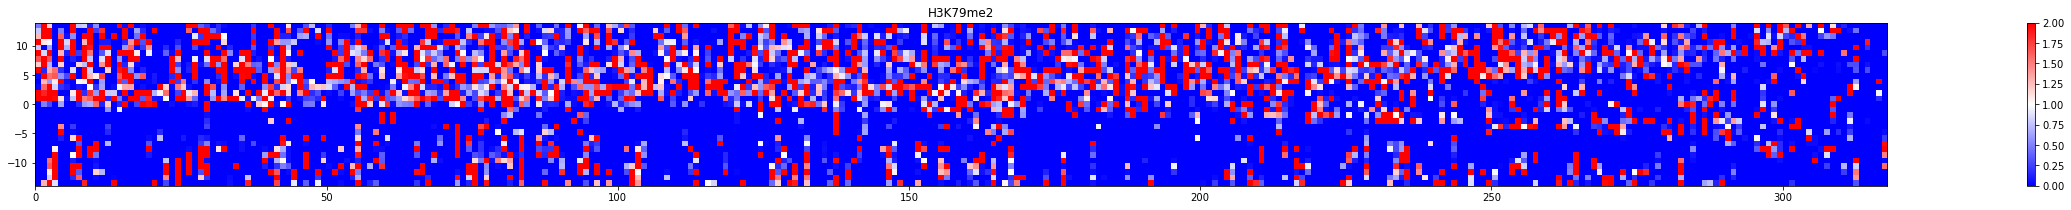

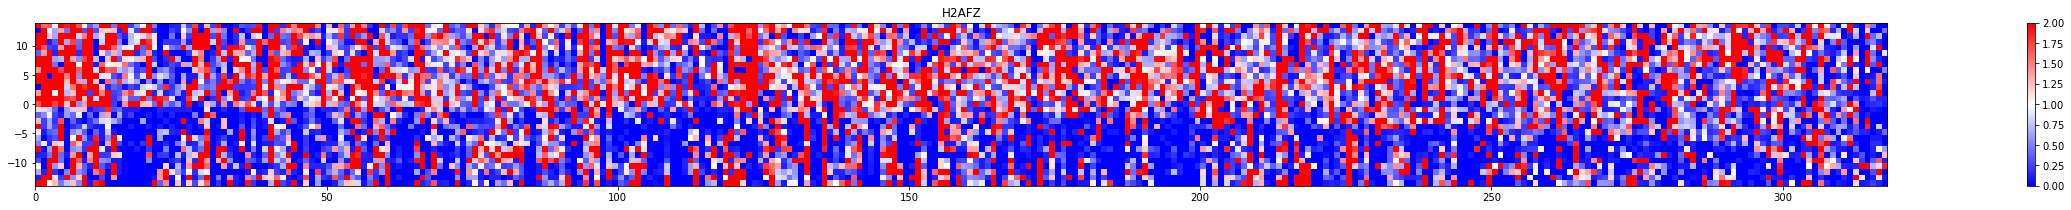

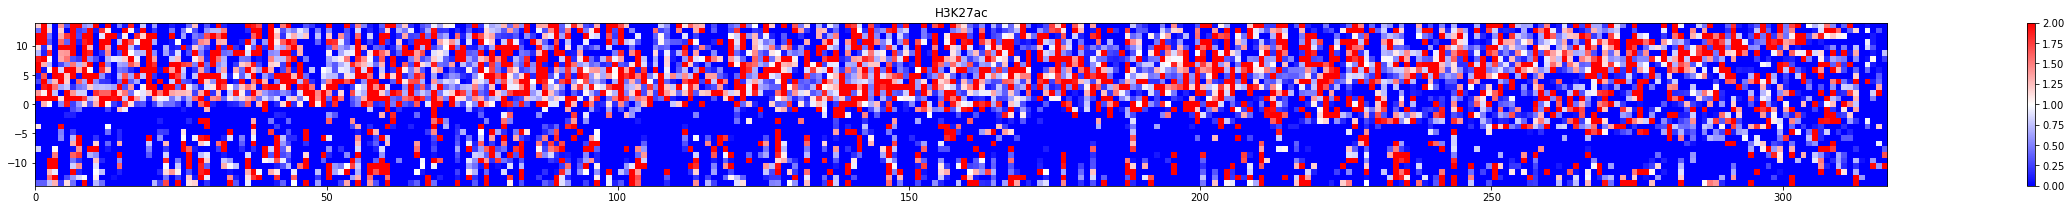

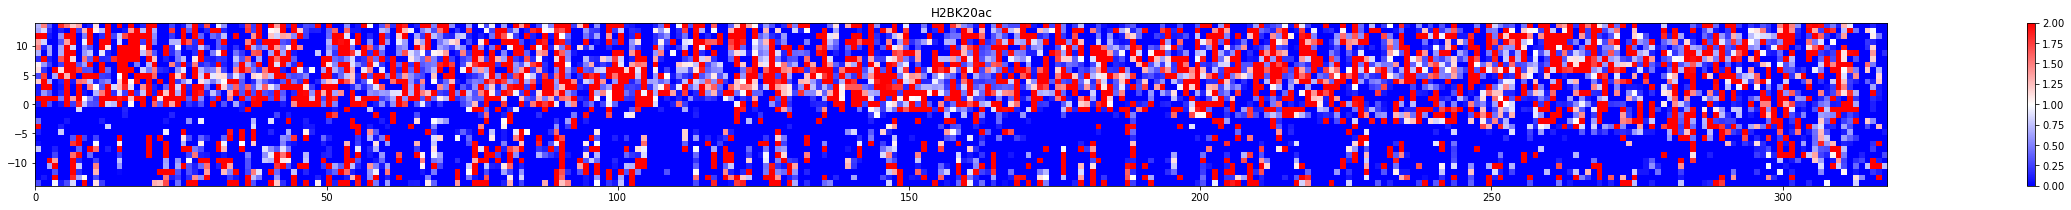

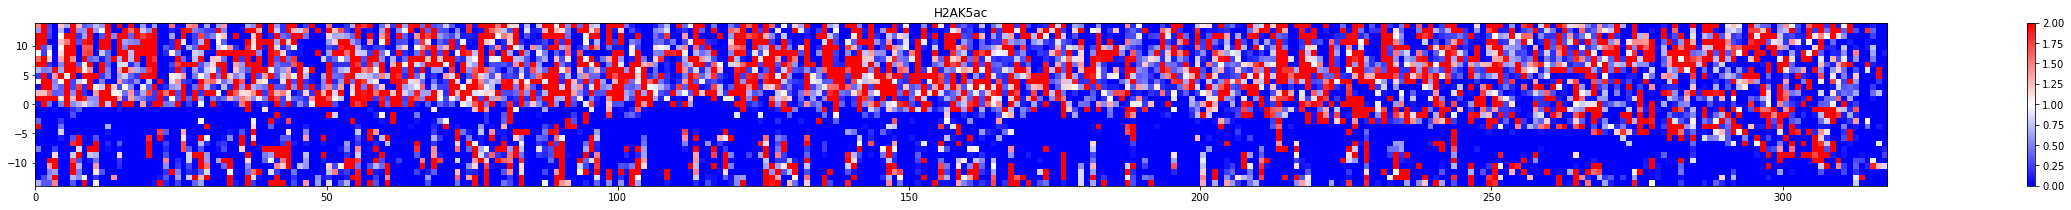

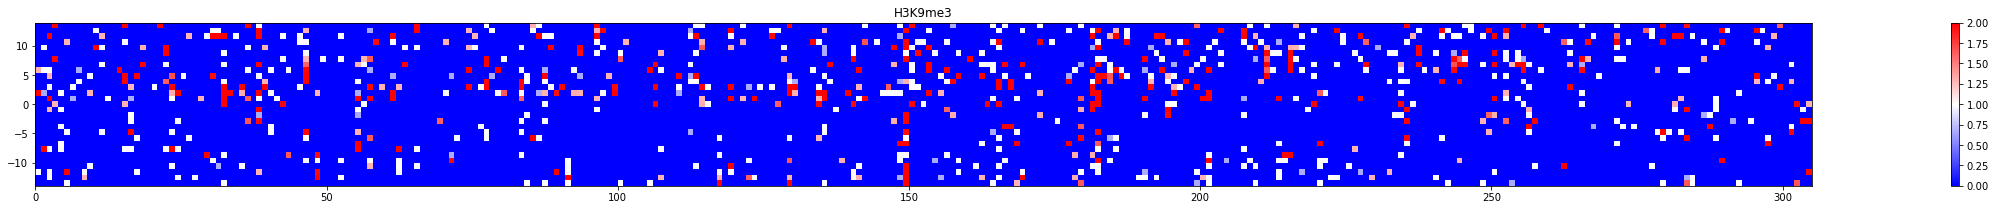

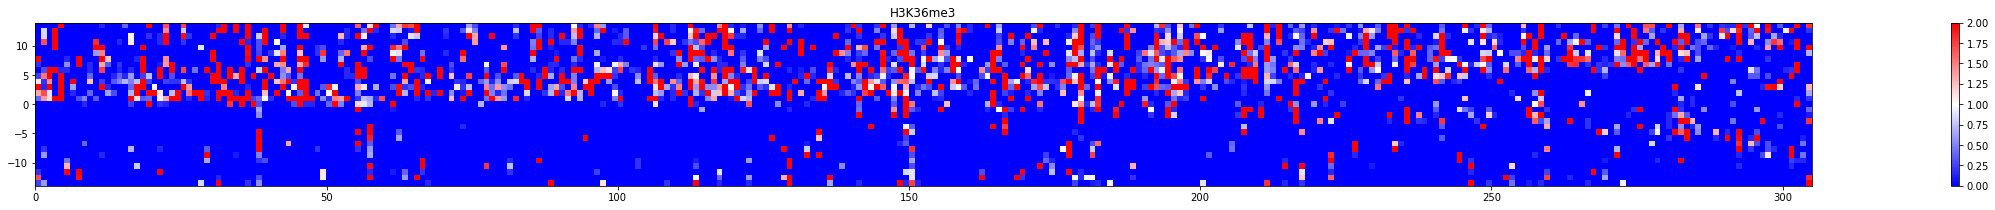

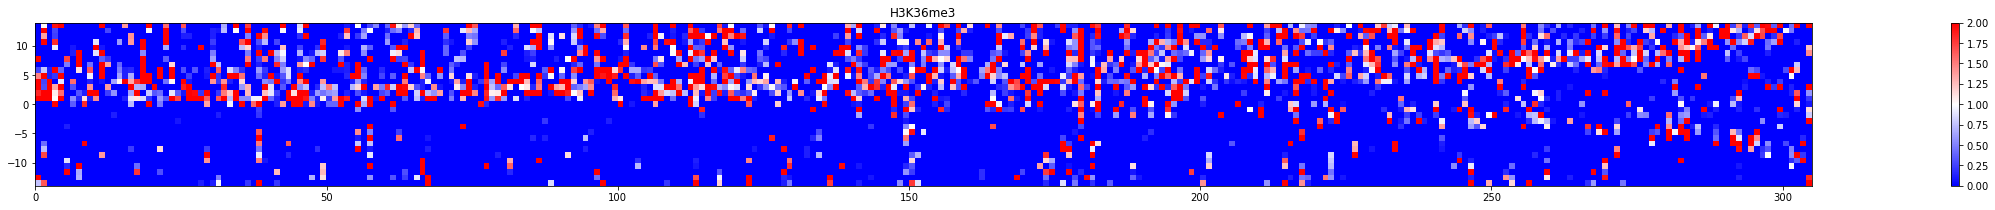

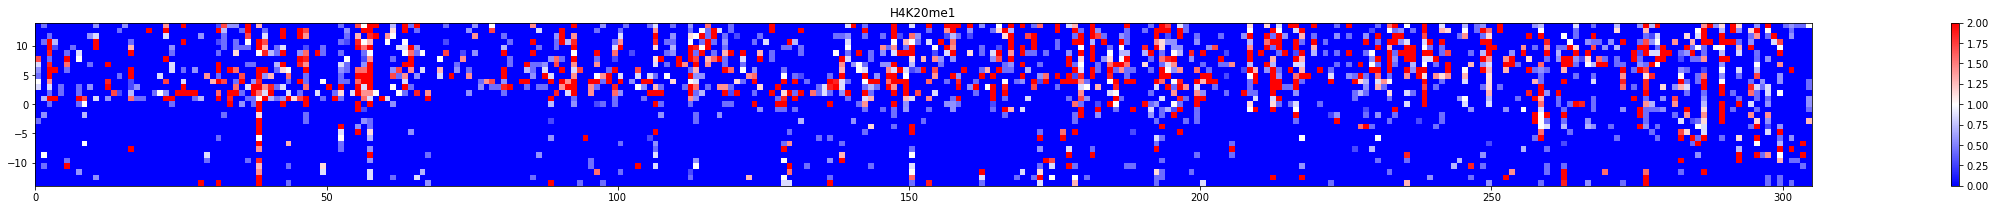

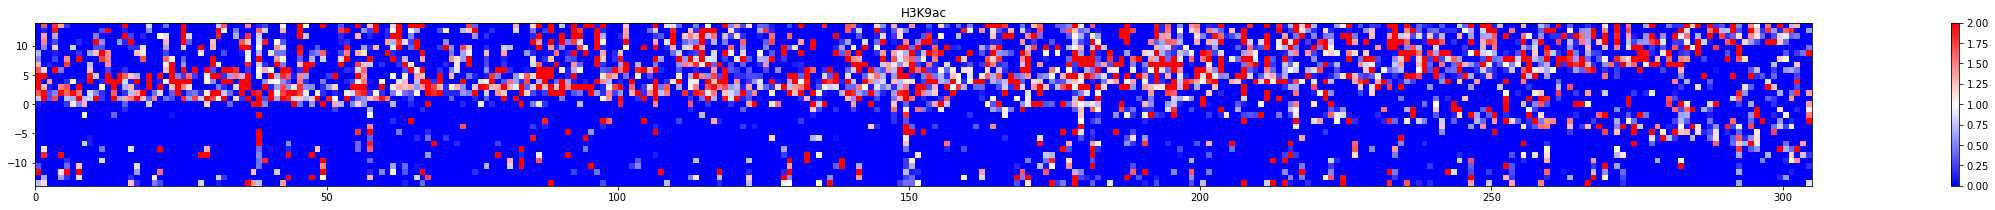

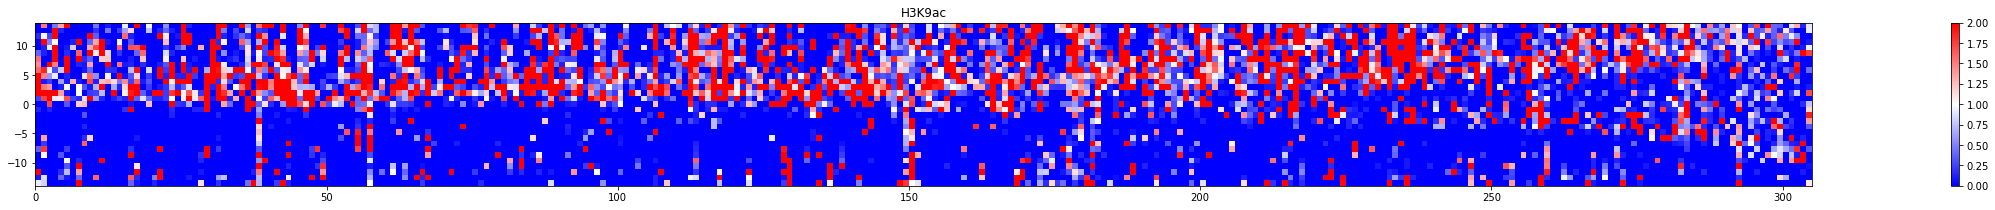

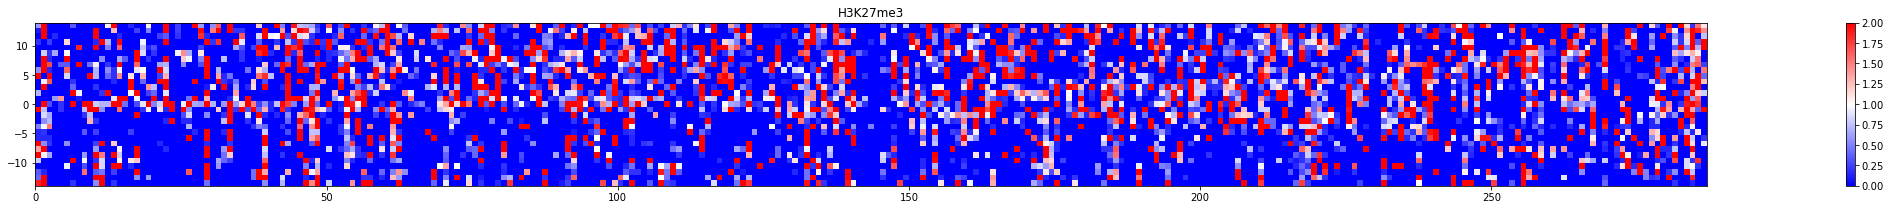

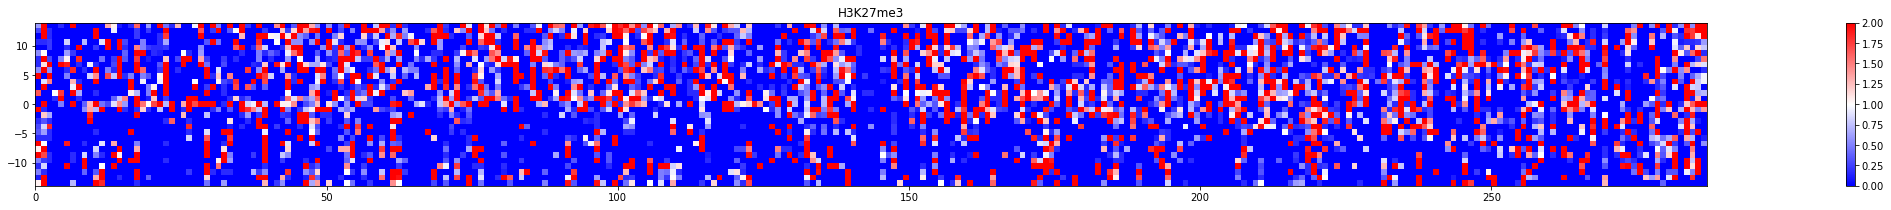

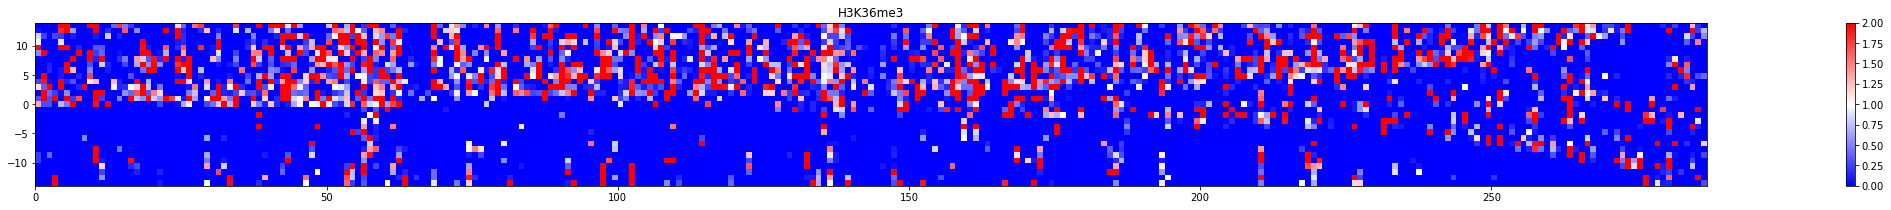

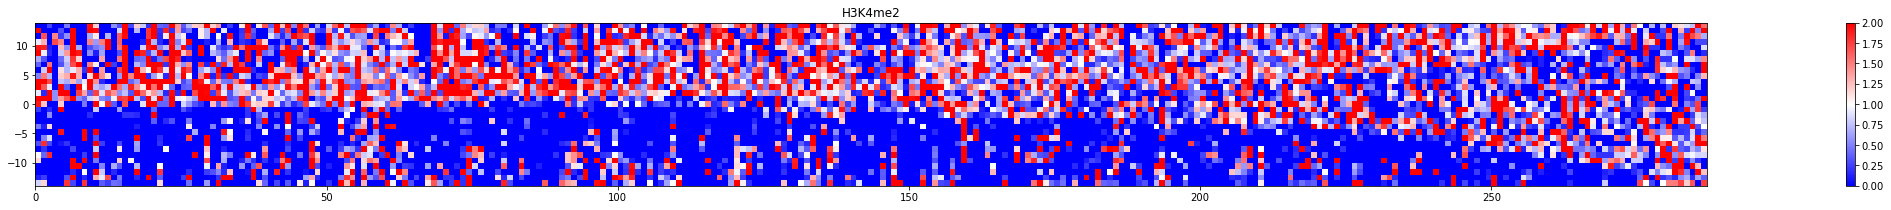

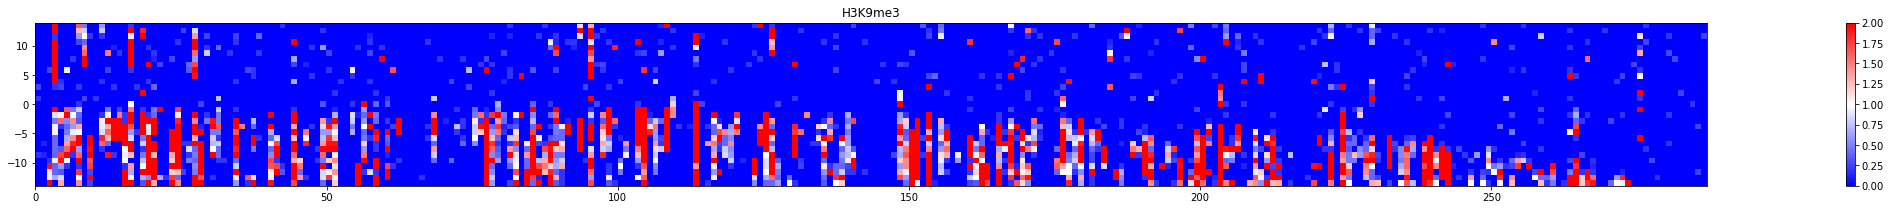

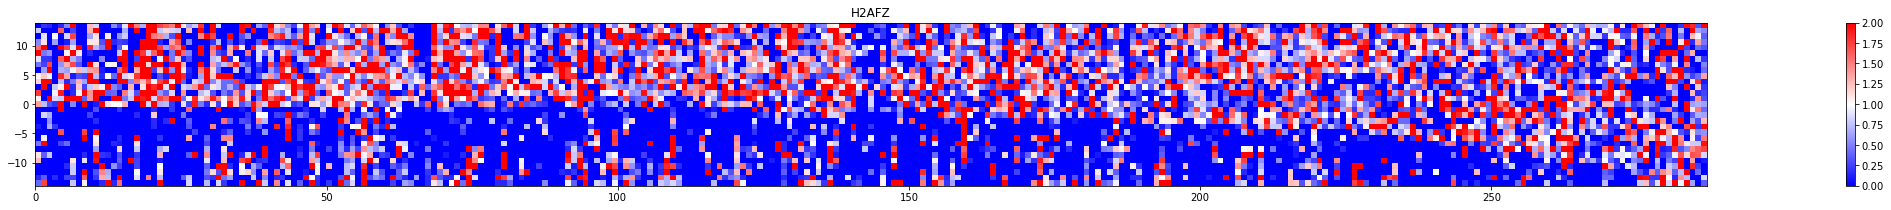

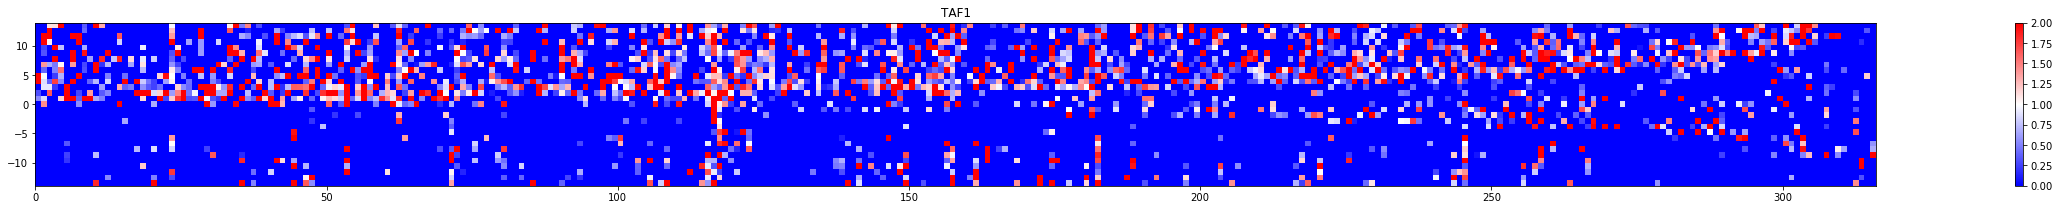

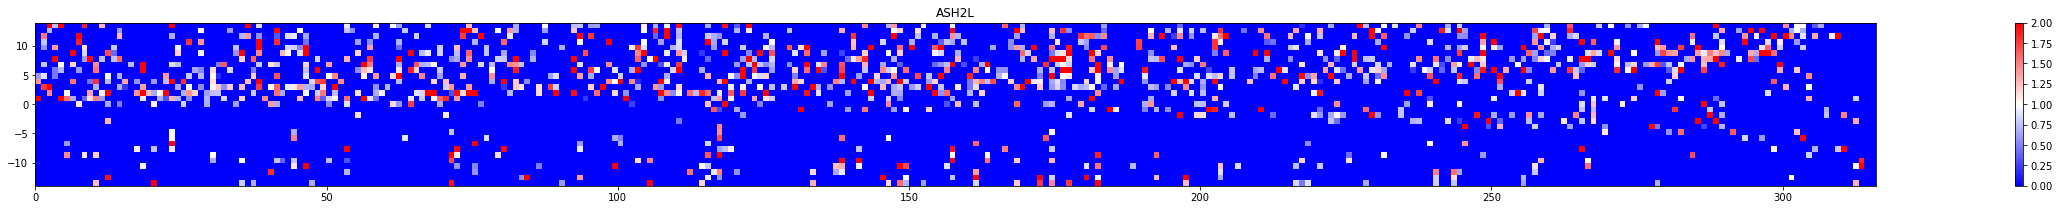

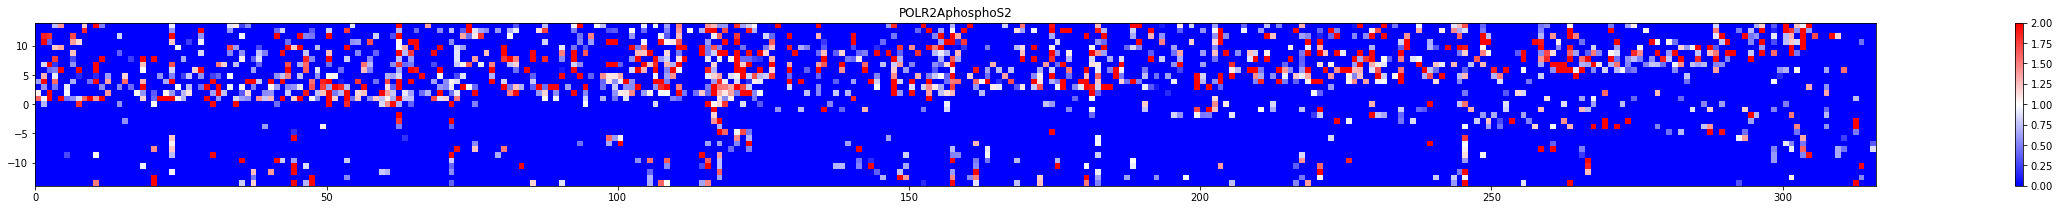

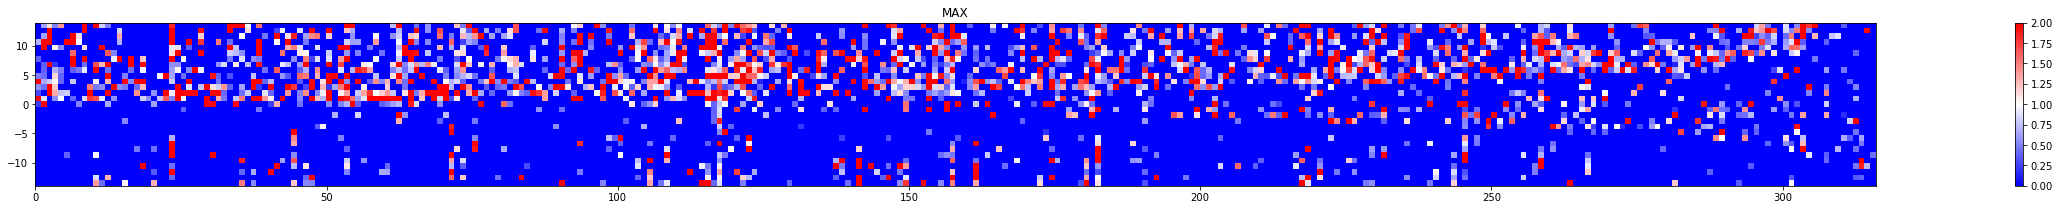

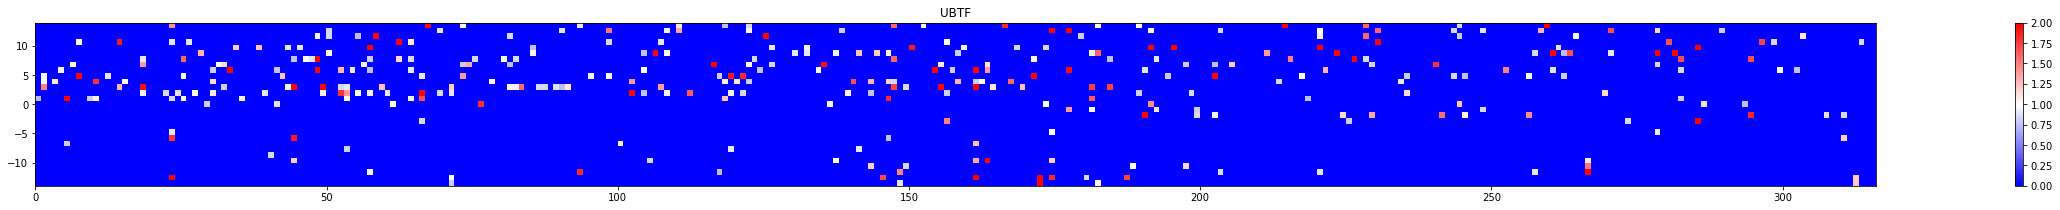

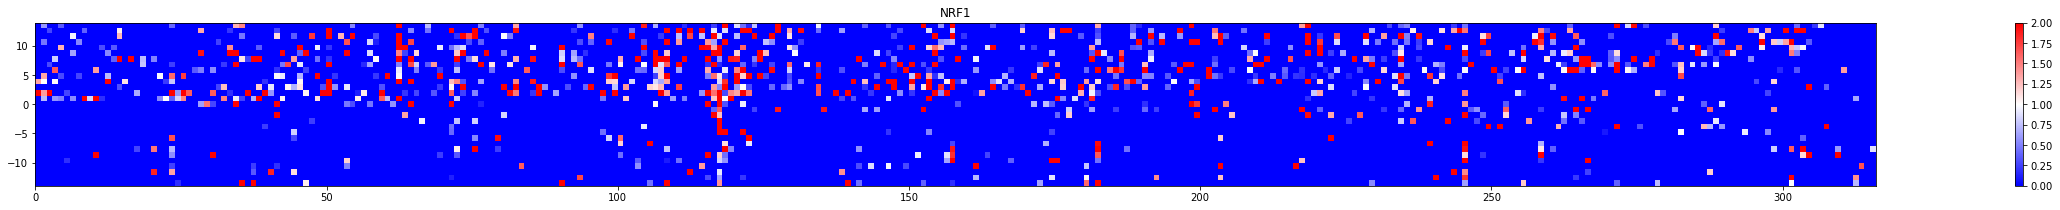

In [688]:
for k in range(len(df)):
    loc = get_chips(beds_df, df.iloc[k].cell_line, df.iloc[k].assembly)
    #print(len(loc))
    x = mask_signal(hmm_tracks[k], 'HMM3', 'E1')
    h = np.array([2, 1, 0])
    conv_list, index_list = find_pattern(x, h, 50)
    for i in range(len(loc)):
        if i > 5:
            break
        windows = stack_windows(index_list, mask_signal(results[k][i], 'signalValue', 'E1'), window = 14)
        mask = windows > np.percentile(windows, 25)

        median = np.median(windows[mask])

        plt.figure(figsize = (50, 3))
        plt.imshow(windows.T/median, vmin = 0, vmax = 2, cmap = 'bwr', extent = [ 0, windows.shape[0], -14, 14])
        plt.colorbar()
        plt.title(loc.target[i]);
        #plt.savefig('plots/' + loc.cell_line[i]+'_' + loc.target[i])
        #plt.close()

In [517]:
windows = stack_windows(index_list, mask_signal(results[6][0], 'signalValue', 'E1'), window = 15)

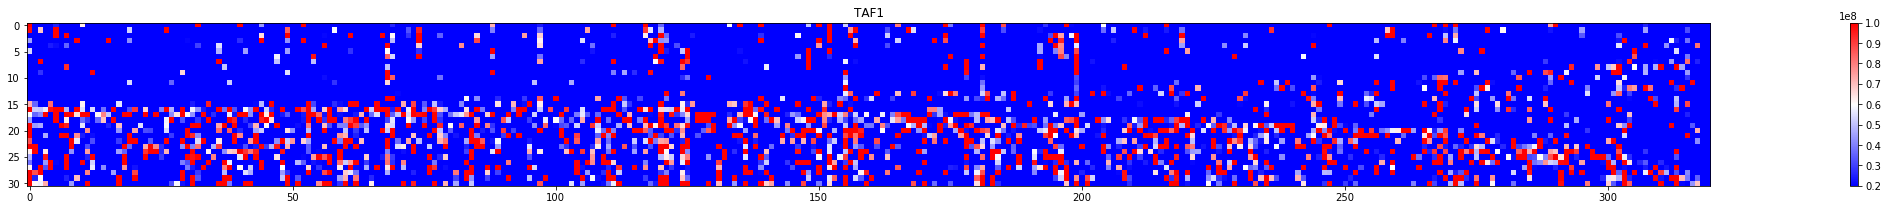

In [518]:
plt.figure(10, figsize = (50, 3))
plt.imshow(windows.T, vmin = 0.2*1e8, vmax = 1*1e8, cmap = 'bwr')
plt.colorbar()
plt.title('TAF1');

In [223]:
def get_blacklist(track):
    mask = track.E1 == track.E1
    values = track[mask].HMM3.values
    transitions = np.where(np.abs(np.diff(values)) > 0)[0]+1
    print(transitions)

In [53]:
get_blacklist(hmm_tracks[6])

[   18    24    30 ... 27572 27588 27589]


In [433]:
def get_transitions(sig, state1, state2):
    '''
        sig: numpy array of a state model
        state1: number of coming from
        state2: number of going to
    '''
    
    target = state2-state1
    diff_sig= np.insert(np.diff(sig), 0, 0, axis = 0)
    p = np.where((diff_sig == target) & (sig == state2))
    return p[0]

In [699]:
#loc_df = r[247]
loc_df = hmm_tracks[3]

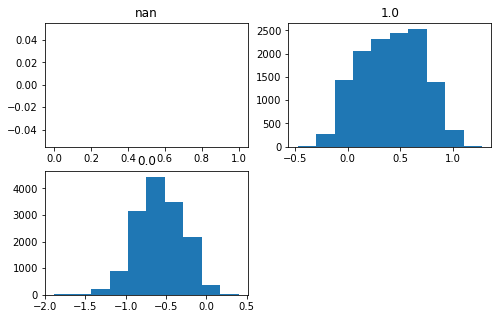

In [719]:
plt.figure(figsize = (8, 5))
for i, state in enumerate(loc_df['HMM2'].unique()):
    plt.subplot(2, 2, i + 1)
    y = loc_df.E1
    plt.title(state)
    plt.hist(y[loc_df['HMM2'] == state].values)

In [734]:
loc_df = r[145]
mask = loc_df.E1 == loc_df.E1
signal = loc_df.binary[mask]

In [715]:
indexes = np.concatenate((get_transitions(signal, 0, 2), get_transitions(signal, 2, 0)))

In [716]:
indexes

array([21411,  1199,  4515, 19641, 20470, 21339])

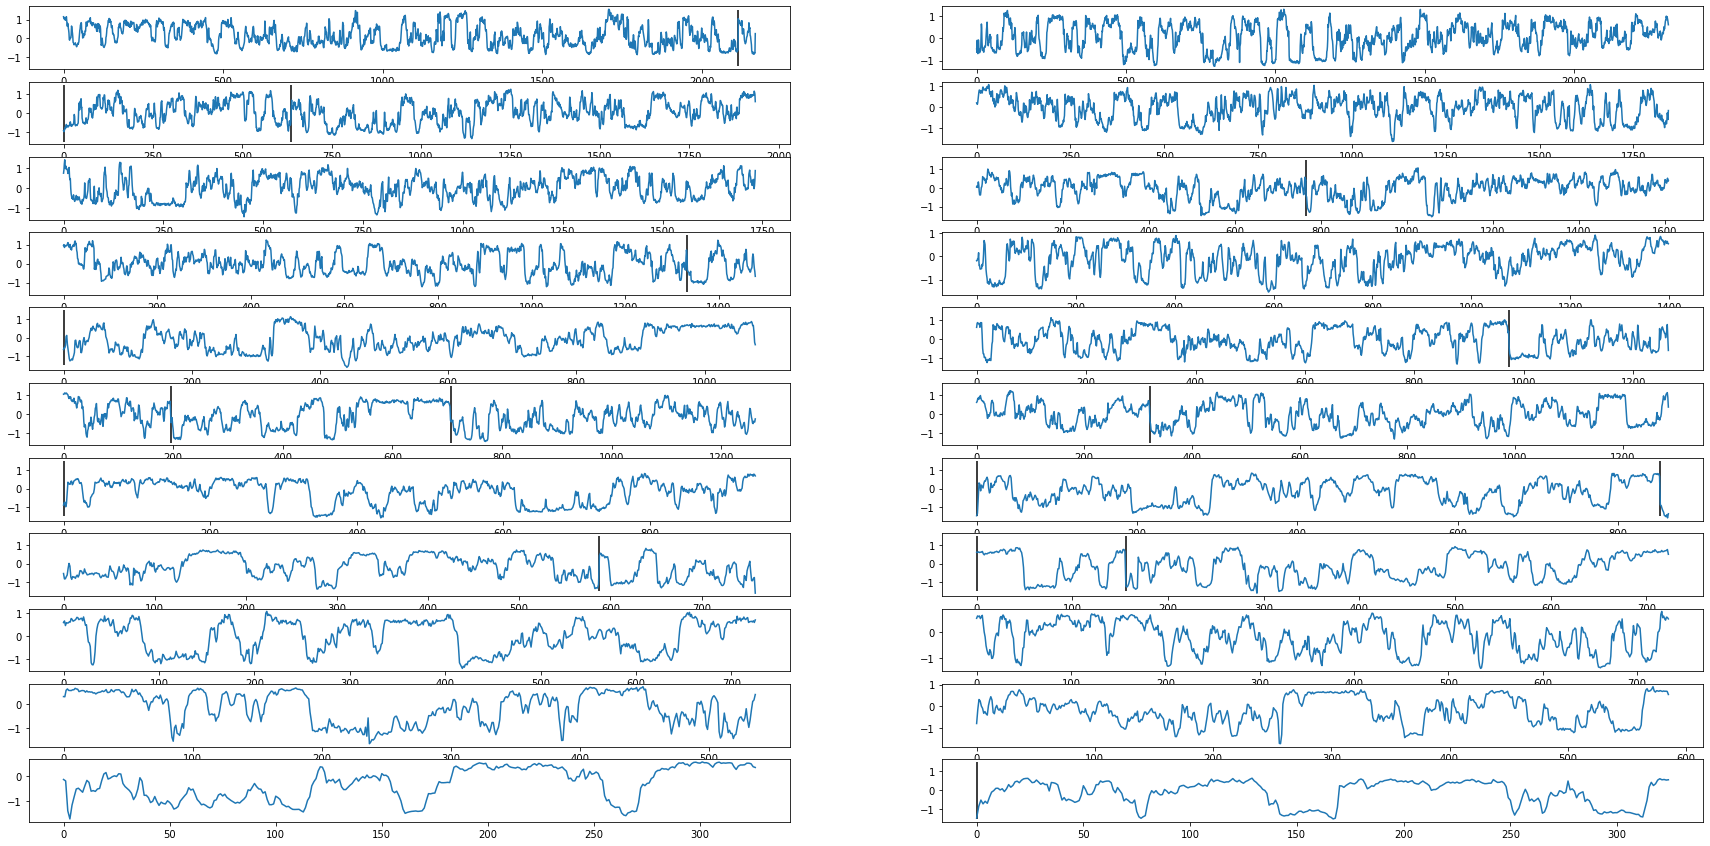

In [703]:
plt.figure(figsize = (30, 15))

L = 0
for i, ch in enumerate(loc_df.chrom.unique()[:-3]):
    
    plt.subplot(11, 2, i+1)
    chrom_df = loc_df[loc_df['chrom']==ch]
    mask = chrom_df.E1==chrom_df.E1
    
    y = chrom_df.E1[mask].values
    
    
    plt.plot(y)
    
    line_mask = np.where( (indexes-L >= 0) & (indexes-L < len(y)) )[0]
    
    plt.vlines(indexes[line_mask]-L, ymin=-1.5, ymax = 1.5)
    
    
    L+= len(y)
    
    

In [569]:
def plot_chroms(track, *signal):
    '''
        Used to plot different biological signals in different chromosomes
        track: it takes in a pandas dataframe of Hi-C data
        signal: takes in a tuple or multiple parameters of the columns to be plotted, it will do so per chromosome
        
        
        By default the signals plotted will only be at points with no NaNs in the E1 column.
    '''
    plt.figure(figsize = (30, 20))
    i = 1
    for ch in track.chrom.unique()[:-3]: #avoids the last three chroms, X, Y and M
        plt.subplot(11, 2, i)
        plt.title(ch)
        P = track[track.chrom == ch]
        mask = ~P['E1'].isna()
        for s in signal:
            E = P[mask][s].values
            if s != 'E1':
                E/= np.nanmax(E) - np.nanmin(E)
                E = 2*E -1
            plt.plot(E)
            plt.margins(0)
        i+=1
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                        wspace=0.35)

1199    -0.293096
4515     0.760534
19641    0.591860
20470    0.476209
21339   -0.196666
Name: E1, dtype: float64

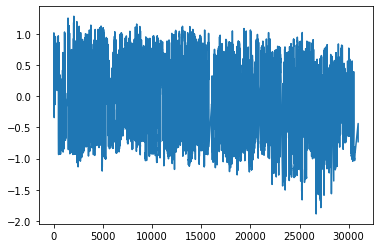

In [570]:
plt.plot(hmm_tracks[6].E1[hmm_tracks[6].E1 == hmm_tracks[6].E1])

In [735]:
indexes = get_transitions(signal, 1, 0)

windows_sig = get_window(indexes, loc_df.signalValue[mask].values,window = 5 )

windows_E1 = get_window(indexes, loc_df.E1[mask].values,window = 5 )

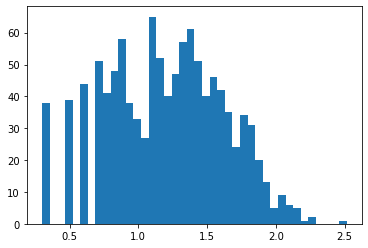

In [736]:
plt.hist(np.log10(np.diff(indexes)), 40);

In [737]:
windows_E1.shape

(688, 11)

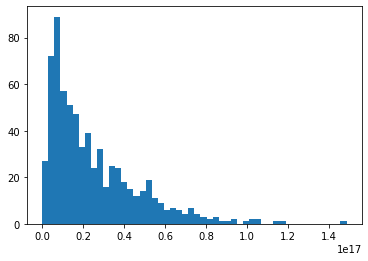

In [738]:
plt.hist(windows_sig[:,1], 50);

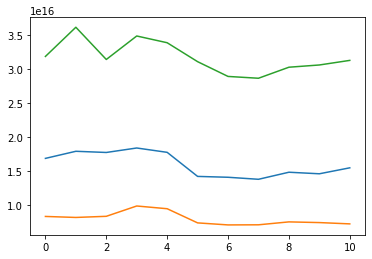

In [739]:
plt.plot(np.median(windows_sig, axis = 0))
plt.plot(np.percentile(windows_sig, 25, axis = 0))
plt.plot(np.percentile(windows_sig, 75, axis = 0))

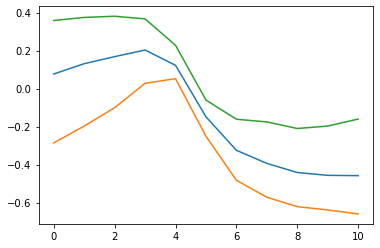

In [740]:

plt.plot(np.median(windows_E1,axis = 0))
plt.plot(np.percentile(windows_E1, 25, axis = 0))
plt.plot(np.percentile(windows_E1, 75, axis = 0))

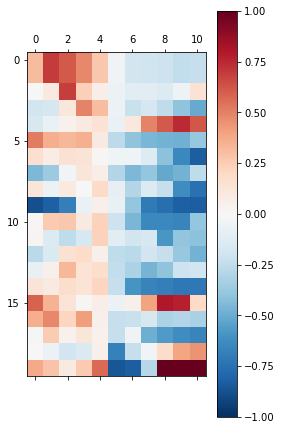

In [741]:
plt.matshow(windows_E1[:20],vmin=-1,vmax=1,cmap='RdBu_r'); plt.colorbar()

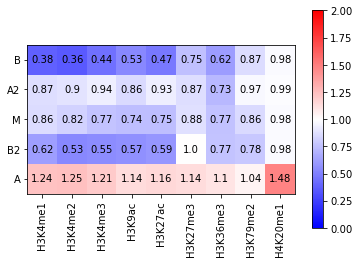

In [497]:
vals = multi_fold(df.iloc[6], hmm_tracks[6], beds_df, 'HMM5_2', *targets)
